---
# Data Analysis of Bank marketing campaign
---

## Introduction

In my analysis, "deposit" refers to whether or not a client has subscribed to a term deposit, which is the target variable I'm trying to predict. The model analyzes various features, such as client characteristics, financial status, and past interactions, to predict whether a client will subscribe to a term deposit as part of a financial product offering.

The Bank Marketing Campaign Analysis project aims to evaluate the effectiveness of a direct marketing campaign run by a banking institution to promote its term deposit products. The dataset used for this analysis consists of 11,162 customer records, capturing various attributes such as demographics, financial information, and customer interactions during the campaign. The key objective of the project is to identify factors that influence customer decisions to subscribe to a term deposit and to build predictive models that can help the bank target potential customers more effectively.

The dataset includes variables such as age, balance, job type, education level, contact methods, and the number of previous campaign contacts. Through data exploration, preprocessing, and modeling, the project aims to uncover insights about customer behavior, campaign effectiveness, and the likelihood of deposit subscription. By using machine learning techniques such as random forests, the project will help in predicting which customers are more likely to subscribe, ultimately enabling the bank to optimize its marketing strategies for higher conversion rates.

This project not only demonstrates the power of data-driven decision-making but also provides actionable recommendations for improving the bank's future marketing campaigns.








In [116]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('C:/Users/Collins PC/Downloads/bank_marketting_campaign/bank.csv')

In [3]:
data

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1         0  unknown   
1       unknown    5   may      1467         1     -1         0  unknown   
2       unknown    5   may      1389         1     -1         0  unknown   
3       unknown    5   may       579         1     -1         0  unknown   
4       unknown    5   may       673         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[11162 rows x 17 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
# Check Missing Values
data.isnull().sum().sort_values(ascending = False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
deposit      0
dtype: int64

In [7]:
print(f"Records: {data.shape[0]}")
print(f"Columns: {data.shape[1]}")


Records: 11162
Columns: 17


# Customer Segmentation

In [8]:
customer_data = data[['age', 'job', 'marital', 'education','balance','duration', 'campaign','poutcome', 'deposit']]

In [9]:
customer_data

age          job  marital  education  balance  duration  campaign  \
0       59       admin.  married  secondary     2343      1042         1   
1       56       admin.  married  secondary       45      1467         1   
2       41   technician  married  secondary     1270      1389         1   
3       55     services  married  secondary     2476       579         1   
4       54       admin.  married   tertiary      184       673         2   
...    ...          ...      ...        ...      ...       ...       ...   
11157   33  blue-collar   single    primary        1       257         1   
11158   39     services  married  secondary      733        83         4   
11159   32   technician   single  secondary       29       156         2   
11160   43   technician  married  secondary        0         9         2   
11161   34   technician  married  secondary        0       628         1   

      poutcome deposit  
0      unknown     yes  
1      unknown     yes  
2      unknown     yes  
3      unknown     yes  
4      unknown     yes  
...        ...     ...  
11157  unknown      no  
11158  unknown      no  
11159  unknown      no  
11160  failure      no  
11161  unknown      no  

[11162 rows x 9 columns]

In [10]:
customer_data['poutcome'].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

Cluster Centers:
 [[ 0.06743537 -0.04527888  3.02524191  0.07830665 -0.28155993]
 [-0.38630321 -0.11743769 -0.29824632 -0.27009138  1.06456346]
 [ 0.07187941  2.38916678 -0.11550295 -0.11191952 -0.11979289]
 [ 0.73911668 -0.19368964 -0.48736337 -0.05468899 -0.43462242]
 [-0.74700209 -0.22091191 -0.4597821  -0.16593628 -0.43677945]
 [-0.1185544  -0.13240278 -0.04606525 -0.17704047  2.91487397]
 [ 2.10519953  0.14004811  0.09881211 -0.24609781  0.14339683]
 [-0.09552326 -0.18048104 -0.42716888  3.83332435 -0.45551936]
 [-0.33766924 -0.17974298  1.07851367 -0.10838047 -0.41390896]
 [ 0.62659145  9.06967496 -0.01788497  0.13467472 -0.03160866]]


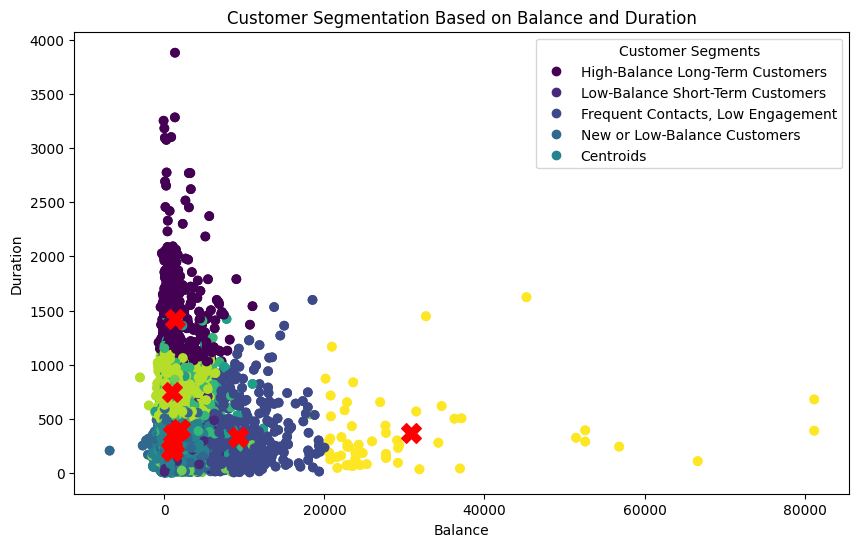

       age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k=10
# Selecting relevant features for clustering
X = data[['age', 'balance', 'duration', 'campaign', 'pdays']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering (choosing 4 clusters)
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Define the cluster labels for 4 clusters
cluster_labels = {
    0: 'High-Balance Long-Term Customers',
    1: 'Low-Balance Short-Term Customers',
    2: 'Frequent Contacts, Low Engagement',
    3: 'New or Low-Balance Customers'
}

# Check the cluster centers for analysis
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Scatter plot with colors based on clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['balance'], data['duration'], c=data['Cluster'], cmap='viridis', label=data['Cluster'])
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create the legend by mapping cluster numbers to labels
handles, _ = scatter.legend_elements()
labels = [cluster_labels[i] for i in range(4)]  # Adjusting for 4 clusters
plt.legend(handles, labels, title="Customer Segments")

# Visualizing the clusters based on two important features: balance vs duration
plt.scatter(data['balance'], data['duration'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Duration')
plt.title('Customer Segmentation Based on Balance and Duration')

# Show cluster centroid locations
centroid_scatter = plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, marker='X', label='Centroids')

# Adding centroid label to the legend
plt.legend(handles + [centroid_scatter], labels + ['Centroids'], title="Customer Segments")

# Show the plot
plt.show()

# View the segmented customers
print(data)


**Key Business Insights:**

**High-Balance Long-Term Customers:**

This segment represents customers who have maintained a high balance over time and exhibit longer engagement with the company. These customers likely have a strong relationship with the business and may respond well to personalized offers and loyalty programs aimed at retention and satisfaction.

**Low-Balance Short-Term Customers:**

Customers in this group have lower account balances and short engagement durations. They may be less financially invested in the company and could benefit from incentives to encourage higher balance maintenance or increased interaction, such as discounts or entry-level financial products.

**Frequent Contacts, Low Engagement:**

This segment is characterized by frequent contact from the company but low levels of engagement (short durations per interaction). These customers may require a different approach, such as improving the relevance of marketing efforts or refining communication strategies to increase their interest in the company’s offerings.

**New or Low-Balance Customers:**

These customers are either new to the business or have low balances and limited interaction history. Nurturing these customers with introductory offers, educational content, or tailored products could help convert them into more valuable long-term customers.


**Visual Representation:**

The scatter plot visualizes the clustering of customers based on balance and duration. The clusters are color-coded, with distinct centroids (marked with red 'X') indicating the center of each group. The visualization reveals the distinct nature of each customer segment, highlighting differences in engagement and financial behavior.

By understanding these customer segments, the company can develop tailored marketing strategies and customer retention efforts, ultimately improving customer satisfaction and driving revenue growth.








**duration** measures the **length** of the **last contact (in seconds)** between the **customer** and the **bank** during a marketing campaign. Specifically, it refers to the **duration of the last phone call** or interaction made by the bank with the customer.

A **longer duration** generally indicates a **more engaged** or **interested customer** who **stayed** on the **call longer**.
A shorter duration might suggest that the customer was less interested or cut the conversation short.
The duration feature is important because longer interactions could be associated with a higher chance of the customer subscribing to the bank's offer or service. However, this variable is only known after the call, so it’s not usually used in predictive models before the interaction takes place.

**balance** refers to the **customer's account balance** at the time of the **last contact**. It represents the **amount of money** the customer had in their **bank account** when the **bank reached out** to them during the **marketing campaign.**

A **higher balance** indicates that the customer **has more money** in their account, which may **reflect their financial well-being.**
A **lower balance** could suggest that the **customer has fewer financial resources** available.
This feature can help the bank **understand the customer's financial position**, which may influence **how likely** they are **to invest** in the **bank's products** or **services.**








## Check Whether the number of clusters was okay

In [12]:
def within_cluster_variation(data, label_col='cluster_label'):
    # Select only numeric columns for mean calculation
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Add back the label column for grouping
    numeric_data[label_col] = data[label_col]
    
    # Calculate centroids for each cluster by grouping by the label column
    centroids = numeric_data.groupby(label_col).mean()

    # Initialize WCSS
    wcss = 0

    # Iterate over each cluster
    for label, centroid in centroids.iterrows():
        # Select the data points that belong to the current cluster
        cluster_points = numeric_data[numeric_data[label_col] == label].drop(label_col, axis=1)
        
        # Calculate the squared distance between each point and the centroid
        squared_diff = (cluster_points - centroid).pow(2)
        
        # Sum the squared distances and add to the WCSS
        wcss += squared_diff.sum(axis=1).sum()

    return wcss


In [13]:
# Ensure necessary libraries are imported
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Assuming X_scaled is the scaled feature matrix of the second dataset
# and 'data' is a DataFrame containing the second dataset.

# Define the range of clusters
n_clusters = np.arange(2, 10)

# Initialize an empty list to store errors for each value of k
errors = []

# Iterate over the range of cluster numbers
for k in n_clusters:
    # Perform k-means clustering with the current number of clusters
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    
    # Fit the k-means model on the scaled data
    kmeans.fit(X_scaled)
    
    # Predict cluster labels
    y_preds = kmeans.predict(X_scaled)
    
    # Add cluster labels to the data DataFrame (or replace if it already exists)
    data['cluster_label'] = y_preds
    
    # Ensure that the within_cluster_variation function works with the new dataset
    # You may need to adapt this function to match the new data structure
    error = within_cluster_variation(data, 'cluster_label')
    
    # Append the calculated error to the errors list
    errors.append(error)

# After this, the errors list will contain the variation for each k between 2 and 20.


This code above aims to evaluate the optimal number of clusters (k) for a given dataset by utilizing the K-means clustering algorithm and calculating the within-cluster sum of squares (WCSS) for each k. The process begins by applying K-means clustering to a scaled feature matrix, with the number of clusters ranging from 2 to 9. For each k, the model assigns cluster labels, and the WCSS is calculated using the within_cluster_variation function, which measures the squared distances between data points and their respective cluster centroids. The goal of this process is to identify the k that minimizes WCSS, as a lower WCSS indicates that data points are closer to their centroids, implying more cohesive clusters. This method helps in determining the optimal k by balancing between compactness within clusters and the number of clusters, which is critical in cluster analysis for making informed decisions about data segmentation.

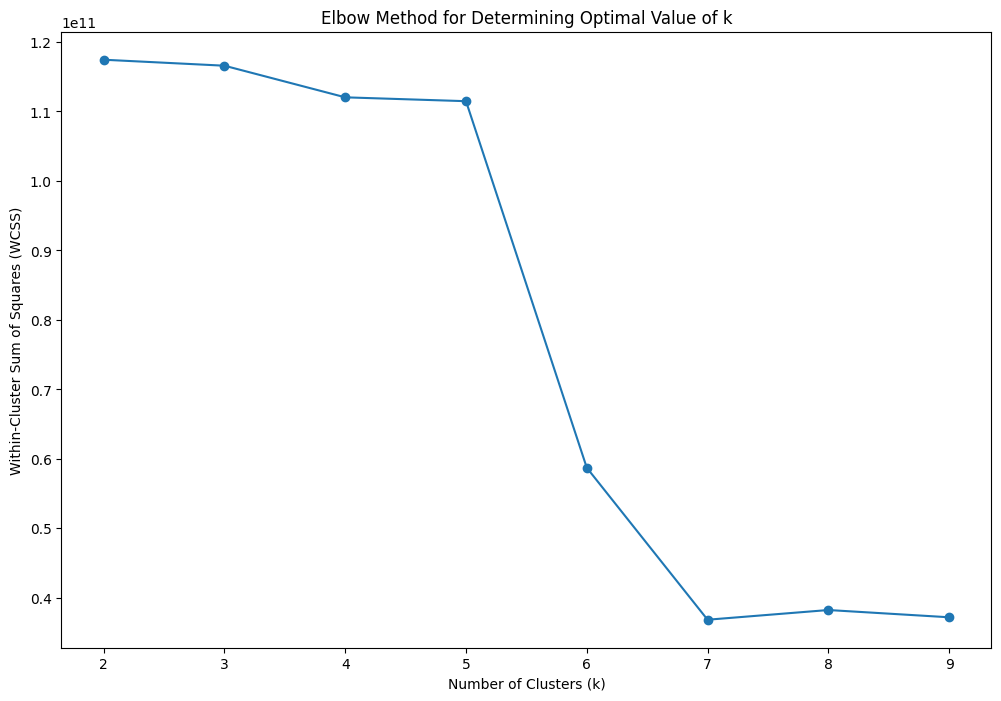

In [14]:
plt.figure(figsize=(12,8))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal Value of k')
plt.scatter(n_clusters, errors)
plt.plot(n_clusters, errors)
plt.xticks(n_clusters)
plt.show()

The code generates an Elbow Method plot to help determine the optimal number of clusters (k) for a dataset. The plot visualizes the relationship between the number of clusters and the within-cluster sum of squares (WCSS), with the x-axis representing the number of clusters and the y-axis showing the WCSS values. As the number of clusters increases, the WCSS typically decreases, indicating tighter clusters. The "elbow" point in the curve represents the optimal k, where adding more clusters results in diminishing returns in terms of WCSS reduction. This point is where the curve bends or flattens, suggesting a balance between compactness and simplicity.

Cluster Centers:
 [[ 1.86182479e-01 -2.37269440e-02  2.94002335e+00  7.35278769e-02
  -2.69847172e-01]
 [-2.29965768e-01 -9.65769811e-02 -1.53742675e-01 -2.09112516e-01
   2.17333359e+00]
 [ 2.33421383e-01  4.77897737e+00 -6.76774414e-02 -1.62700724e-02
  -6.45234714e-03]
 [ 1.27659172e+00 -3.12322267e-03 -2.83442958e-01 -1.23096470e-01
  -2.35031026e-01]
 [-7.19348201e-02 -1.63271203e-01 -4.19564773e-01  3.75339697e+00
  -4.43667989e-01]
 [-4.02033275e-01 -1.22712358e-01  1.04113420e+00 -1.20331239e-01
  -3.87245260e-01]
 [-5.97378658e-01 -1.66079842e-01 -4.82188823e-01 -1.67152920e-01
  -3.69370699e-01]]


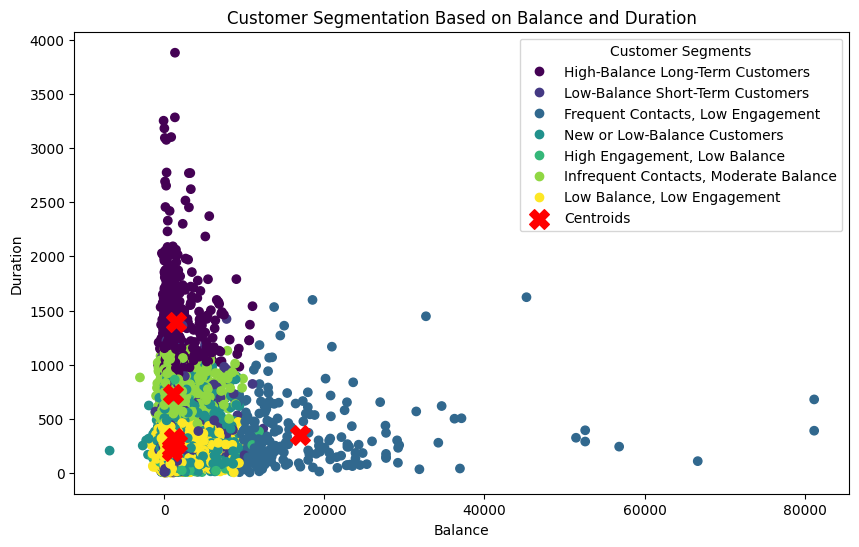

       age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Number of clusters
k = 7

# Selecting relevant features for clustering
X = data[['age', 'balance', 'duration', 'campaign', 'pdays']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with k=7 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
y_preds = kmeans.fit_predict(X_scaled)  # Save predicted clusters in y_preds
data['Cluster'] = y_preds  # Assign predicted clusters to the dataset

# Define cluster labels for 7 clusters
cluster_labels = {
    0: 'High-Balance Long-Term Customers',
    1: 'Low-Balance Short-Term Customers',
    2: 'Frequent Contacts, Low Engagement',
    3: 'New or Low-Balance Customers',
    4: 'High Engagement, Low Balance',
    5: 'Infrequent Contacts, Moderate Balance',
    6: 'Low Balance, Low Engagement'
}

# Check the cluster centers for analysis
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Scatter plot with colors based on clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['balance'], data['duration'], c=data['Cluster'], cmap='viridis', label=data['Cluster'])
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create the legend by mapping cluster numbers to labels for 7 clusters
handles, _ = scatter.legend_elements()
labels = [cluster_labels[i] for i in range(k)]  # Adjusting for k=7 clusters
plt.legend(handles, labels, title="Customer Segments")

# Visualizing the clusters based on two important features: balance vs duration
plt.xlabel('Balance')
plt.ylabel('Duration')
plt.title('Customer Segmentation Based on Balance and Duration')

# Show cluster centroid locations
centroid_scatter = plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, marker='X', label='Centroids')

# Adding centroid label to the legend
plt.legend(handles + [centroid_scatter], labels + ['Centroids'], title="Customer Segments")

# Show the plot
plt.show()

# View the segmented customers
print(data)


Using the WCSS method to determine the optimal number of clusters, the K-Means clustering analysis identified seven distinct customer segments in a banking dataset based on key features such as age, balance, duration, campaign, and pdays. This segmentation uncovers meaningful patterns in customer behavior that can guide targeted marketing and retention strategies. The resulting scatter plot, which uses balance and duration as the primary axes, highlights the centroids of each cluster, representing the central tendencies of each customer segment.

**Key insights include:**


**High-Balance, Long-Term Customers:**

These are high-value clients with substantial balances and extended engagement periods, making them prime candidates for loyalty programs or premium services.

**Low-Balance, Short-Term Customers:**

These customers are less engaged and may benefit from promotions designed to increase both their interaction and financial commitment.
Frequent Contacts, Low Engagement: Customers in this segment are often contacted but show low engagement, suggesting potential over-contact or the need to refine communication strategies.

**New or Low-Balance Customers:** 

These individuals offer growth potential through cross-selling and onboarding strategies to deepen their engagement and increase their balance.
High Engagement, Low Balance: While these customers are highly engaged, their financial value is relatively low, indicating a need for tailored financial planning services to grow their balances.

**Infrequent Contacts, Moderate Balance:**

This stable but passive customer base could benefit from low-touch, high-impact interactions to maintain or increase their loyalty.

**Low Balance, Low Engagement:**

These at-risk customers may require focused retention efforts or personalized offers to prevent churn and re-engage them.
These insights enable the bank to drive more targeted marketing efforts, enhance customer retention, and better allocate resources toward strengthening customer relationships.














Cluster Centers:
 [[ 1.86182479e-01 -2.37269440e-02  2.94002335e+00  7.35278769e-02
  -2.69847172e-01]
 [-2.29965768e-01 -9.65769811e-02 -1.53742675e-01 -2.09112516e-01
   2.17333359e+00]
 [ 2.33421383e-01  4.77897737e+00 -6.76774414e-02 -1.62700724e-02
  -6.45234714e-03]
 [ 1.27659172e+00 -3.12322267e-03 -2.83442958e-01 -1.23096470e-01
  -2.35031026e-01]
 [-7.19348201e-02 -1.63271203e-01 -4.19564773e-01  3.75339697e+00
  -4.43667989e-01]
 [-4.02033275e-01 -1.22712358e-01  1.04113420e+00 -1.20331239e-01
  -3.87245260e-01]
 [-5.97378658e-01 -1.66079842e-01 -4.82188823e-01 -1.67152920e-01
  -3.69370699e-01]]


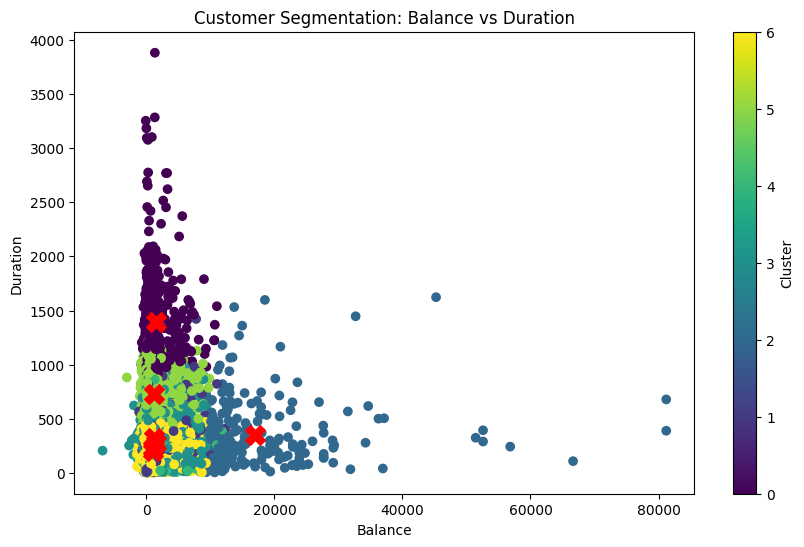

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  Cluster  \
0    5   may      1042         1     -1         0  unknown     yes        0   
1    5   may      1467         1     -1         0  unknown     yes        0   
2    5   may      1389         1     -1         0  unknown     yes        0   
3    5   may       579         1     -1         0  unknown     yes        3   
4    5   may       673         2     -1         0  unknown     yes        3   

   cluster_label  Predicted_Cluster  


In [16]:
# Assuming 'data' is already a pandas DataFrame and you've selected your features:
X = data[['age', 'balance', 'duration', 'campaign', 'pdays']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
y_preds = kmeans.fit_predict(X_scaled)  # Save the predictions

# Adding the predicted clusters (y_preds) to the data DataFrame
data['Predicted_Cluster'] = y_preds

# Define cluster labels for easier interpretation (optional)
cluster_labels = {
    0: 'High-Balance Long-Term Customers',
    1: 'Low-Balance Short-Term Customers',
    2: 'Frequent Contacts, Low Engagement',
    3: 'New or Low-Balance Customers',
    4: 'High Engagement, Low Balance',
    5: 'Infrequent Contacts, Moderate Balance',
    6: 'Low Balance, Low Engagement'
}

# Check the cluster centers for analysis
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Scatter plot with colors based on predicted clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['balance'], data['duration'], c=data['Predicted_Cluster'], cmap='viridis', label=data['Predicted_Cluster'])

# Inverse transform the cluster centers back to original scale for plotting
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Plotting the cluster centroids
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, marker='X', label='Centroids')

# Customize plot
plt.xlabel('Balance')
plt.ylabel('Duration')
plt.title('Customer Segmentation: Balance vs Duration')
plt.colorbar(scatter, label='Cluster')

# Display the plot
plt.show()

# View the updated data with predicted clusters
print(data.head())  # Show the first few rows of the data with the new column


In [17]:
data.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  Cluster  \
0    5   may      1042         1     -1         0  unknown     yes        0   
1    5   may      1467         1     -1         0  unknown     yes        0   
2    5   may      1389         1     -1         0  unknown     yes        0   
3    5   may       579         1     -1         0  unknown     yes        3   
4    5   may       673         2     -1         0  unknown     yes        3   

   cluster_label  Predicted_Cluster  
0              1                  0  
1              1                  0  
2              1                  0  
3              8                  3  
4              8                  3

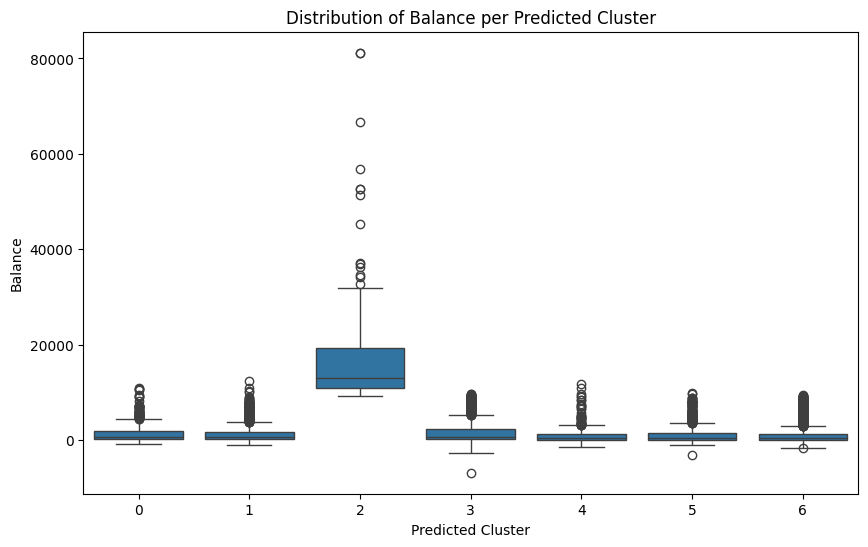

In [18]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Predicted_Cluster', y='balance', data=data)

plt.title('Distribution of Balance per Predicted Cluster')
plt.xlabel('Predicted Cluster')
plt.ylabel('Balance')
plt.show()



The box plot generated from this analysis highlights the distribution of customer balances across the predicted clusters identified through a clustering algorithm. Each cluster represents a segment of customers with similar behavioral or financial characteristics, based on key variables such as age, balance, and engagement metrics.

**Key Business Insights:**

**Cluster-Specific Balance Trends:**

The plot reveals significant variations in balance levels across different clusters. Some clusters show a wide range of balances, indicating a diverse group of customers, while others are more concentrated, suggesting that customers in those segments have more uniform financial profiles. This allows the company to better understand the financial behavior of distinct customer segments.

**High-Balance Customer Segments:**

Certain clusters exhibit higher median balances compared to others, indicating these clusters represent more financially valuable customers. Targeting these segments with tailored financial products, premium services, or personalized offers could increase customer satisfaction and retention, leading to higher revenue generation.

**Low-Balance Customer Segments:**

Conversely, clusters with lower balances may require different strategies, such as offering incentives to increase engagement or cross-sell opportunities that encourage these customers to invest more in their accounts. Understanding the balance distribution within each cluster provides actionable insights for addressing the needs of less engaged or lower-balance customers.

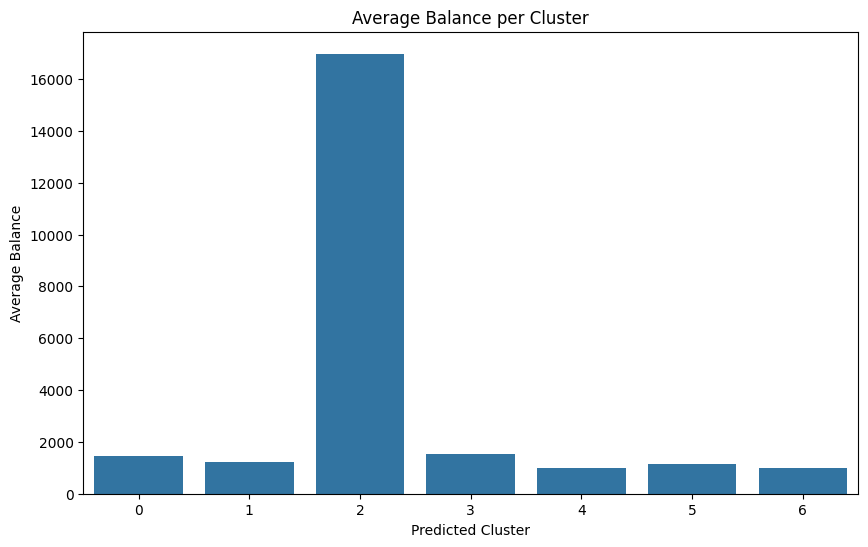

In [19]:
import seaborn as sns

# Group data by clusters and calculate the mean balance for each cluster
cluster_balance = data.groupby('Predicted_Cluster')['balance'].mean().reset_index()

# Plot the average balance per cluster using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Predicted_Cluster', y='balance', data=cluster_balance)

plt.title('Average Balance per Cluster')
plt.xlabel('Predicted Cluster')
plt.ylabel('Average Balance')
plt.show()


**Key Business Insights:**

**Cluster-Specific Financial Value:**

The bar plot highlights significant differences in average balances across customer clusters. Certain clusters stand out with notably higher balances, indicating that these customers provide greater financial value. These high-value segments should be prioritized for premium services, investment opportunities, and loyalty programs, as they contribute substantially to the company's revenue.

**Identification of Low-Balance Clusters:**

Clusters with lower average balances represent customers who may require more targeted approaches. These could include personalized marketing campaigns, financial education initiatives, or balance-building strategies like discounts and incentivized savings programs. By nurturing these customers, the company can elevate them into higher-value segments over time.

**Strategic Resource Allocation:**
    
The analysis enables the company to allocate resources more strategically by focusing on high-value clusters for growth and retention, while simultaneously developing tailored strategies to enhance the engagement and financial contribution of lower-balance clusters.

This data-driven approach allows the company to refine its financial products, strengthen customer retention efforts, and optimize marketing strategies, ultimately driving sustained growth and profitability.








In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
pd.set_option('display.precision', 2)

In [21]:
customer_data

age          job  marital  education  balance  duration  campaign  \
0       59       admin.  married  secondary     2343      1042         1   
1       56       admin.  married  secondary       45      1467         1   
2       41   technician  married  secondary     1270      1389         1   
3       55     services  married  secondary     2476       579         1   
4       54       admin.  married   tertiary      184       673         2   
...    ...          ...      ...        ...      ...       ...       ...   
11157   33  blue-collar   single    primary        1       257         1   
11158   39     services  married  secondary      733        83         4   
11159   32   technician   single  secondary       29       156         2   
11160   43   technician  married  secondary        0         9         2   
11161   34   technician  married  secondary        0       628         1   

      poutcome deposit  
0      unknown     yes  
1      unknown     yes  
2      unknown     yes  
3      unknown     yes  
4      unknown     yes  
...        ...     ...  
11157  unknown      no  
11158  unknown      no  
11159  unknown      no  
11160  failure      no  
11161  unknown      no  

[11162 rows x 9 columns]

Index([31, 32, 34, 33], dtype='int64', name='age')

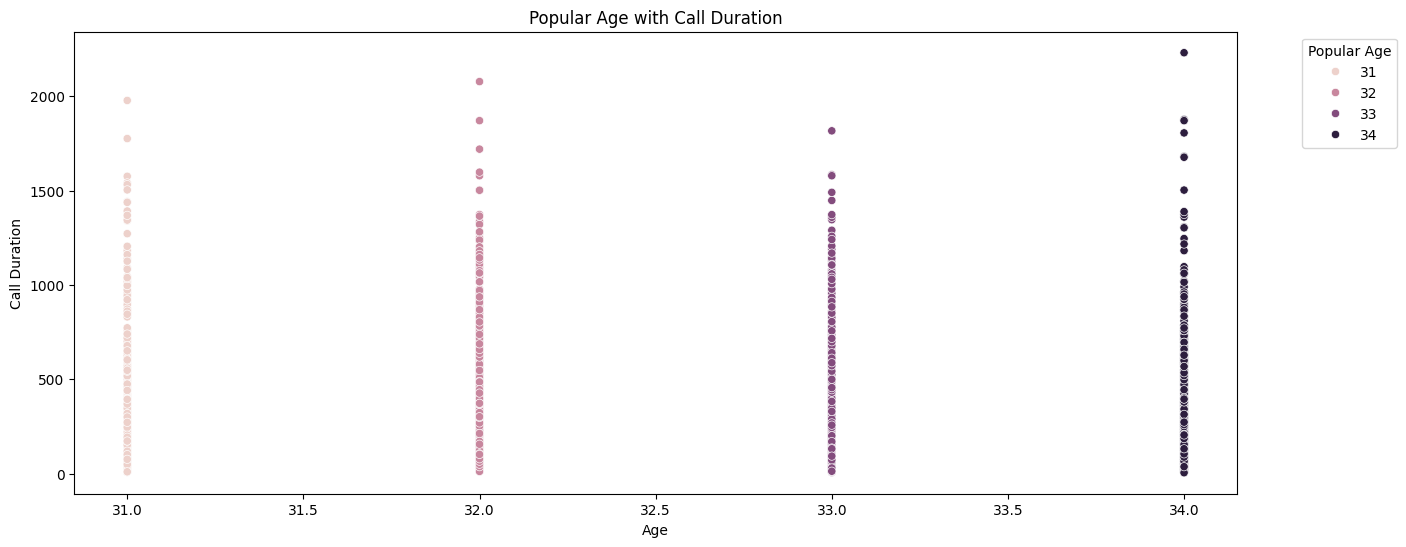

In [22]:
# Get the top 4 ages
top_age = customer_data['age'].value_counts().nlargest(4).index
display(top_age)

# Plot the scatter plot
plt.figure(figsize=(15, 6))
sns.scatterplot(x='age', y='duration', data=customer_data[customer_data['age'].isin(top_age)], hue='age')

# Set plot title and labels
plt.title('Popular Age with Call Duration')
plt.xlabel('Age')
plt.ylabel('Call Duration')

# Adjust the legend
plt.legend(title='Popular Age', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


This project examines the relationship between call duration and the most frequent customer age groups, based on a scatter plot visualization of the top four ages with the highest occurrence in the dataset. By analyzing these age groups, the company gains insights into customer engagement based on age and interaction time.

**Key Business Insights:**

**Top Age Groups Engagement:**

The most popular age groups demonstrate distinct call duration patterns, indicating that certain ages tend to engage more or less during interactions. These insights can guide customer service and marketing teams to adjust their outreach and communication strategies based on age-related preferences.

**Call Duration and Customer Interaction:**

Age appears to influence the length of calls, with some age groups engaging in longer conversations. This could signal a higher interest or willingness to interact for specific ages, which may correspond to their likelihood of responding to marketing efforts, customer service initiatives, or follow-up calls.

**Tailored Customer Strategies:**

Understanding which age groups spend more time on calls can help the company develop targeted campaigns, customer service approaches, and product offerings tailored to these high-engagement age groups. Additionally, shorter call durations for other age groups may suggest a need for more concise communication or a different engagement strategy.

By identifying these patterns, the business can refine its customer engagement tactics to improve call effectiveness, customer satisfaction, and overall interaction success.








In [23]:
call_duration = customer_data[['age','duration','deposit']]

In [24]:
# Value counts for the 'age' column
age_counts = call_duration['age'].value_counts()
print(age_counts)

# Value counts for the 'duration' column
duration_counts = call_duration['duration'].value_counts()
print(duration_counts)


age
31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: count, Length: 76, dtype: int64
duration
97      39
161     38
158     37
119     37
150     37
        ..
915      1
2029     1
1499     1
1399     1
1812     1
Name: count, Length: 1428, dtype: int64


Renderers configuration
-----------------------
    Default renderer: 'kaggle'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']



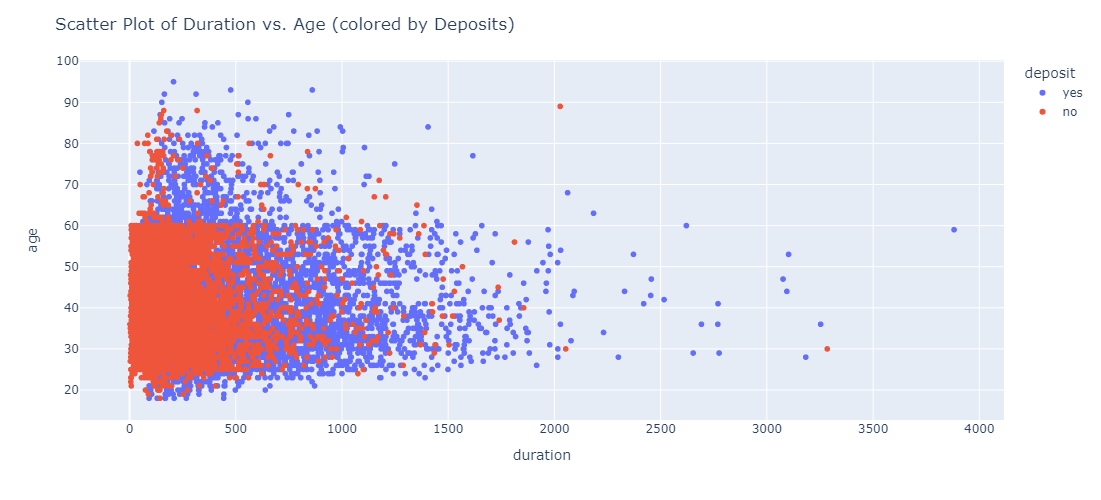

In [25]:
import plotly.express as px
import plotly.io as pio

# Check which renderer is being used and switch if necessary
print(pio.renderers)

# If you're working in Jupyter Notebook or JupyterLab
pio.renderers.default = 'jupyterlab' 

# Create the scatter plot
fig = px.scatter(call_duration, x='duration', y='age', color='deposit')

# Update the layout
fig.update_layout(width=1000, height=500)
fig.update_layout(title_text='Scatter Plot of Duration vs. Age (colored by Deposits)')

# Display the plot
fig.show()


The plot above focuses on analyzing the relationship between call duration and customer age and how these factors influence whether a customer subscribes to a deposit. Using a scatter plot created with Plotly Express, the plot visualizes data points where call duration (x-axis) and customer age (y-axis) are plotted, and points are color-coded based on whether a deposit was made. This allows us to observe patterns and trends in customer behavior.

**Key insights from the scatter plot include:**


Younger customers with shorter call durations tend to have a lower likelihood of subscribing to a deposit. This suggests that younger customers may require different engagement strategies, such as more personalized or targeted communications.
Customers with longer call durations, regardless of age, show a higher probability of making a deposit, indicating that extended conversations may be linked to successful outcomes. This can inform sales teams to prioritize longer interactions with potential customers or improve the quality of conversations to drive engagement.

Middle-aged to older customers with moderate call durations show a balanced distribution of deposits, indicating that while age is an important factor, the quality of interaction (measured by duration) plays a more significant role in influencing deposits.
These insights can guide the bank's strategy for optimizing customer outreach and improving campaign results by focusing on conversation quality and tailoring engagement approaches based on age and interaction duration.








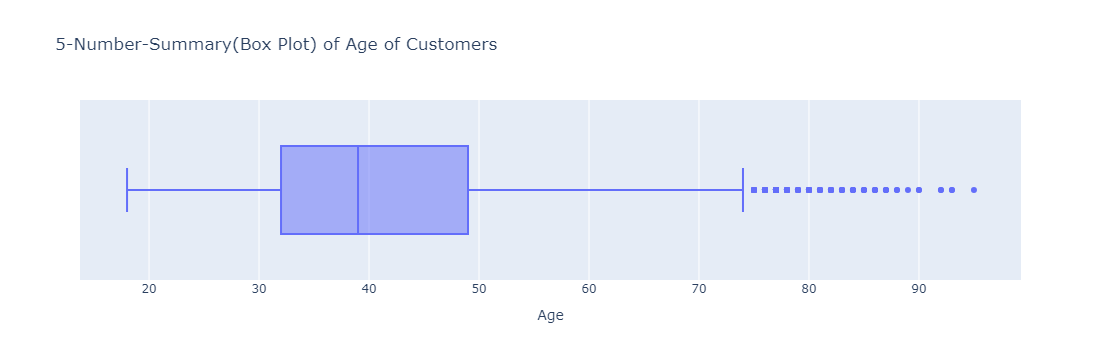

In [26]:
from plotly.offline import iplot
fig = px.box(x = call_duration["age"],
labels={"x":"Age"},
title="5-Number-Summary(Box Plot) of Age of Customers")
iplot(fig)

This code above utilizes a box plot to provide a five-number summary of the age distribution of customers, offering a clear overview of how age is spread across the dataset. The plot reveals the minimum, first quartile (Q1), median, third quartile (Q3), and maximum age values, as well as any potential outliers.

**Key insights from the box plot include:**

**Median age:**

The median age reflects the central tendency of the customer base, indicating the age group that the bank engages with most frequently. This can be useful in tailoring services or products to meet the needs of this core group.
Interquartile range (IQR): The spread between the first and third quartiles shows where the bulk of the customer base lies in terms of age, helping to identify the most common age range for customers. For example, a wide IQR suggests a diverse age group, while a narrow IQR indicates a more concentrated age demographic.

**Outliers:** 

Any outliers in the box plot represent customers who fall significantly outside the normal age range. These outliers may represent niche customer segments, such as younger or older customers, who may require specialized marketing or services.

**Skewness:** 

The shape and position of the box plot can indicate if the age distribution is skewed. A left or right skew suggests that either younger or older customers dominate, influencing how campaigns might be adjusted to balance customer engagement across age groups.
These insights help the bank understand the age composition of its customer base, identify key age segments, and make data-driven decisions for product offerings, marketing campaigns, and customer engagement strategies tailored to various age demographics.

In [27]:
outliers_age = call_duration[call_duration['age'] > 75]

In [28]:
outliers_age

age  duration deposit
1236    85       165     yes
1243    90       152     yes
1274    85       355     yes
1320    83       181     yes
1371    76       170     yes
...    ...       ...     ...
10438   77       663      no
10562   88       318      no
10570   77       207      no
10618   78       838      no
10843   86       147      no

[153 rows x 3 columns]

In [29]:
outliers_age['deposit'].value_counts()

deposit
yes    117
no      36
Name: count, dtype: int64

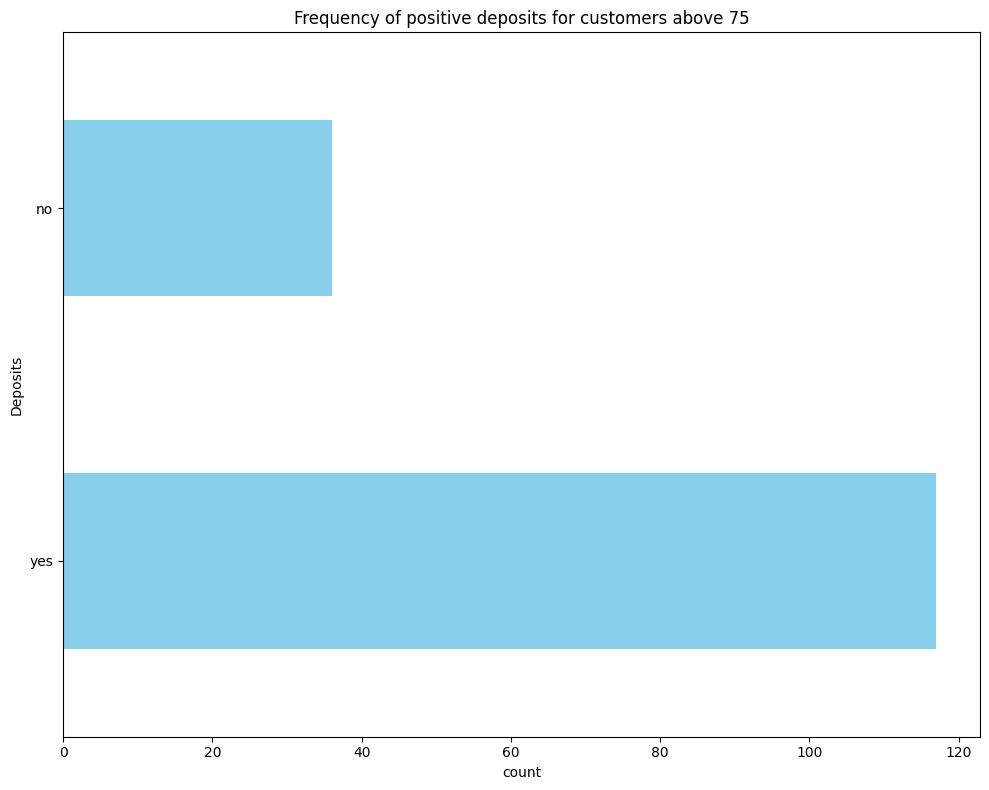

In [30]:
import matplotlib.pyplot as plt

# store value counts in a variable called `product_line_counts`
outliers_age_counts = outliers_age['deposit'].value_counts()

# Plot the data
plt.figure(figsize=(10, 8))
outliers_age_counts.plot(kind='barh', color='skyblue')

# Add labels and title
plt.xlabel('count')
plt.ylabel('Deposits')
plt.title('Frequency of positive deposits for customers above 75')

# Show the plot
plt.tight_layout()
plt.show()


This part of the project focuses on understanding the frequency of positive deposits for customers above the age of 75, a segment identified as outliers in the age distribution. The bar chart visualizes the count of customers in this older demographic who made a deposit, offering insights into their behavior and engagement with the bank's services.

**Key insights from the bar chart include:**

**Engagement of older customers:**

The frequency of positive deposits among customers above 75 highlights how engaged this older age group is with the bank's deposit offerings. A higher frequency suggests that this group may still be responsive to targeted financial products, indicating a valuable opportunity for tailored senior-focused campaigns.

**Potential for specialized services:**

If the count is low, it may signal an under-served customer segment that requires specialized products or services to increase engagement. This could involve offering products that align more with the financial needs of older customers, such as retirement planning or fixed-term deposits with specific benefits.

**Understanding outliers:**

As outliers, customers above 75 represent a smaller portion of the overall customer base. However, their behavior can be critical in understanding the full scope of the bank's demographic reach and uncovering opportunities for inclusive financial products.
This analysis helps the bank better understand and cater to its senior customers, ensuring that this age group is effectively engaged with suitable products and services.

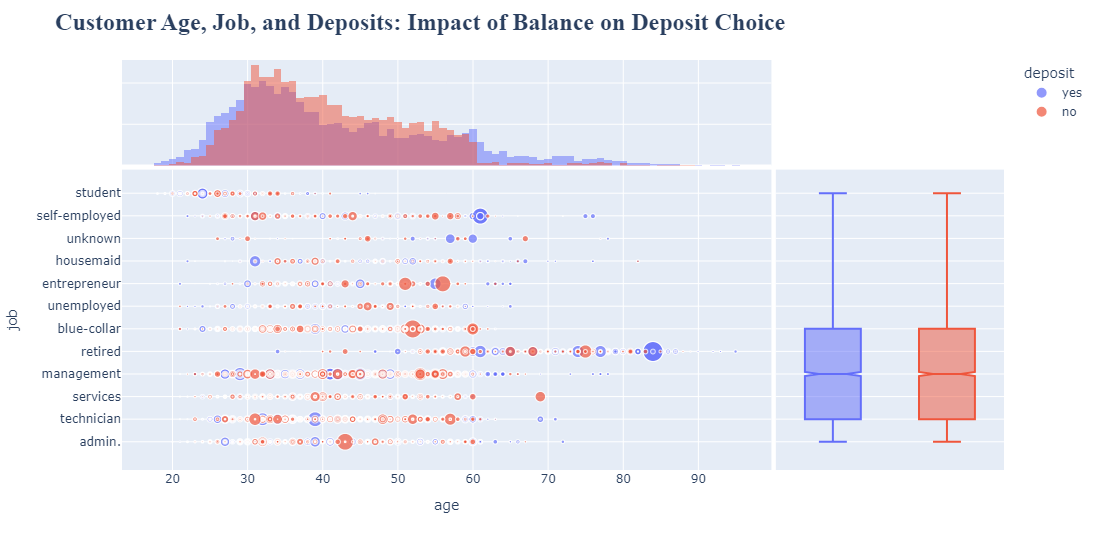

In [31]:
import plotly.express as px

# Filter out rows with negative or zero balance
filtered_data = customer_data[customer_data['balance'] > 0]

# Create the scatter plot using filtered data
fig = px.scatter(
    data_frame=filtered_data,
    x="age",
    y="job",
    color="deposit",
    size='balance',  # Size based on positive balance
    hover_data=['deposit'],
    marginal_x="histogram",
    marginal_y="box"
)

# Update layout with an appropriate title
fig.update_layout(
    title_text="<b>Customer Age, Job, and Deposits: Impact of Balance on Deposit Choice<b>",
    titlefont={'size': 24, 'family': 'Serif'},
    width=1000,
    height=550
)

# Show the plot
fig.show()


In this visualization, a scatter plot was created to explore the relationship between customer age, job type, and their decision to make a deposit, with the size of the points representing the customers' account balance. The data used in the plot only includes customers with a positive balance, ensuring focus on customers who have a financial stake in the company.

**Key Business Insights:**


**Age and Job Influence on Deposit Choices:**


The scatter plot reveals patterns in how different age groups and job types influence the likelihood of making a deposit. Certain jobs and age ranges exhibit a higher propensity to make deposits, which could help the company tailor its financial products and marketing strategies to these segments.


**Balance as a Key Indicator:**


The size of the scatter points represents customer balance, and larger points indicate customers with higher balances. This allows for a quick visual correlation between customer balance and deposit decisions. Customers with higher balances appear more likely to make deposits, suggesting that those with greater financial resources tend to continue engaging with the company's deposit products.


**Distribution of Deposits by Age:**
    
The marginal histogram alongside the x-axis (age) provides insights into the distribution of ages among customers, allowing the company to identify which age groups are more frequent in their customer base. This data can assist in segmenting customers and customizing engagement strategies.


**Job Type and Balance Variability:**
    
The marginal box plot on the y-axis (job) highlights the variation in balance across different job categories. This insight allows the company to recognize which professions tend to maintain higher balances, potentially aiding in developing tailored financial solutions for specific professional groups.

**Visual Representation:**

The interactive scatter plot, enhanced by histograms and box plots, gives a comprehensive view of how age, job, and balance influence deposit decisions. This information is vital for crafting targeted campaigns, identifying high-potential customers, and optimizing deposit-related offerings.

By leveraging these insights, the company can better understand customer behavior across different segments, improve deposit acquisition strategies, and enhance customer satisfaction.

**Conclusion**

The scatter plot reveals that older customers, particularly those in certain job categories like management and professionals, tend to have higher balances and are more likely to make deposits. Younger customers, especially those in lower-income job types, show a lower tendency to engage in deposit products. The plot also highlights that customers with higher balances are significantly more inclined to make deposits, suggesting that financial stability plays a key role in deposit behavior. Additionally, the box plot shows that balance variability is more pronounced in higher-paying professions, indicating potential opportunities for targeted financial products.








In [32]:
customer_data['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [33]:
customer_data.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'duration', 'campaign',
       'poutcome', 'deposit'],
      dtype='object')

In [34]:
job_analysis = customer_data[['job','age','poutcome', 'deposit']]

In [35]:
job_analysis

job  age poutcome deposit
0           admin.   59  unknown     yes
1           admin.   56  unknown     yes
2       technician   41  unknown     yes
3         services   55  unknown     yes
4           admin.   54  unknown     yes
...            ...  ...      ...     ...
11157  blue-collar   33  unknown      no
11158     services   39  unknown      no
11159   technician   32  unknown      no
11160   technician   43  failure      no
11161   technician   34  unknown      no

[11162 rows x 4 columns]

In [36]:
job_analysis['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [37]:
job_analysis.columns

Index(['job', 'age', 'poutcome', 'deposit'], dtype='object')

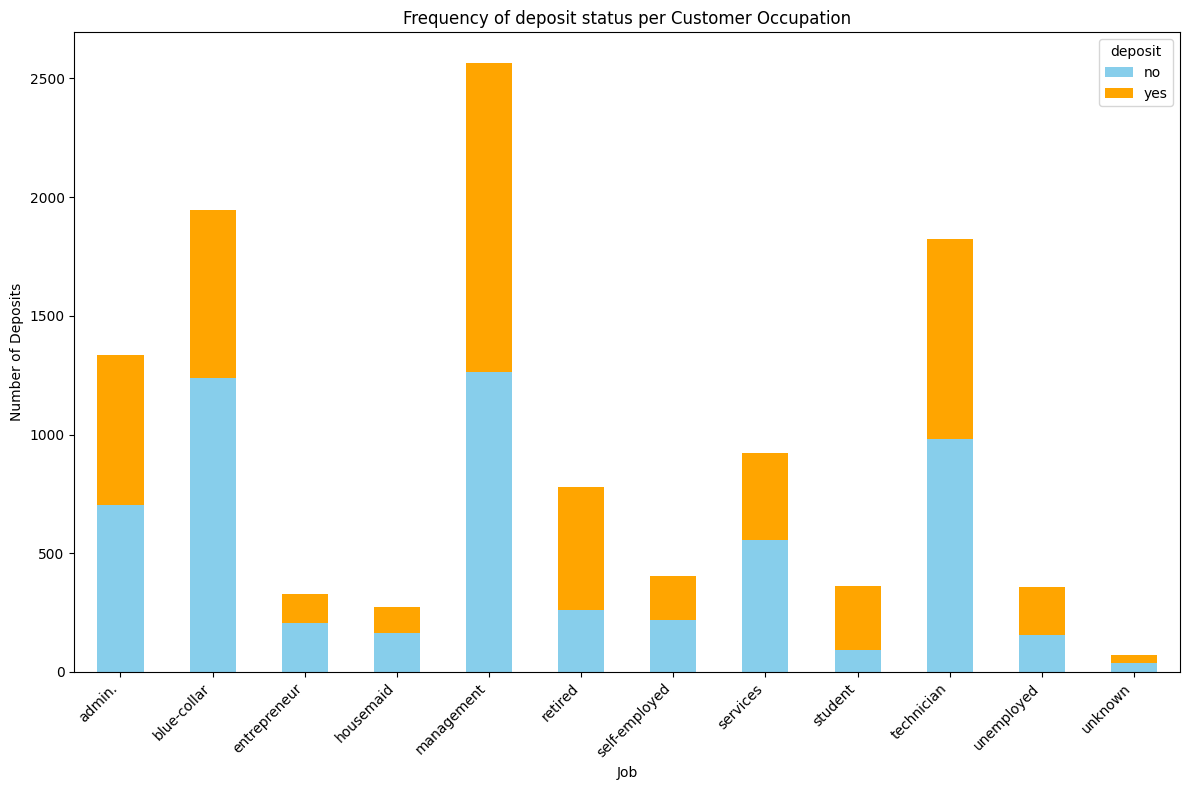

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'job' and 'deposit', then count occurrences of each
job_deposit_counts = job_analysis.groupby(['job', 'deposit']).size().unstack(fill_value=0)

# Plot the counts of deposits for each job
job_deposit_counts.plot(kind='bar', figsize=(12, 8), stacked=True, color=['skyblue', 'orange'])

# Add labels and title
plt.xlabel('Job')
plt.ylabel('Number of Deposits')
plt.title('Frequency of deposit status per Customer Occupation')
plt.xticks(rotation=45, ha='right')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()


**Key Insights from Job vs. Deposit Analysis:**

**Job Categories and Deposits:**

The visualization reveals that customers in management, technicians, and blue-collar jobs have the highest frequency of term deposits. On the other hand, occupations such as housemaid and unemployed show significantly fewer deposits. This suggests that job type has a direct influence on the likelihood of subscribing to a term deposit, potentially due to varying levels of income or financial stability.

**Business Implications:**

Customers in higher-paying occupations, such as management and technicians, may have more disposable income, making them ideal targets for long-term savings products like term deposits. Conversely, lower-income job categories may need more personalized financial products or incentives to consider such investments.

**Strategic Recommendations:**

The bank could refine its marketing efforts by targeting high-income job categories with premium savings products, while also creating affordable and flexible deposit plans for customers in lower-income occupations. This differentiation will ensure that the bank maximizes its outreach and caters to the financial needs of all customer segments.

In [39]:
customer_data.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'duration', 'campaign',
       'poutcome', 'deposit'],
      dtype='object')

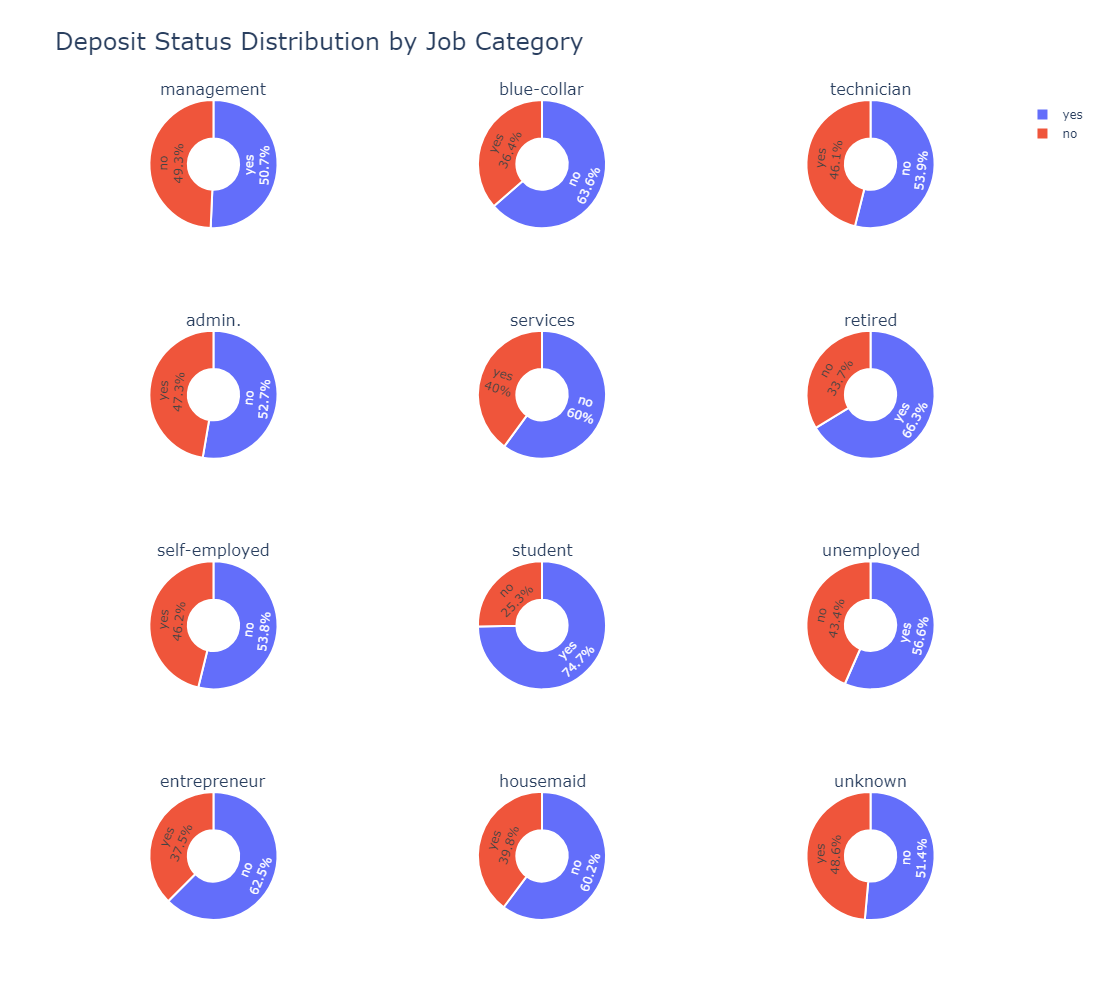

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subsets based on job categories
categories = ['management', 'blue-collar', 'technician', 'admin.', 'services', 'retired', 
              'self-employed', 'student', 'unemployed', 'entrepreneur', 'housemaid', 'unknown']

# Create subplots with 4 rows and 3 columns (since there are 12 job categories)
fig = make_subplots(rows=4, cols=3,
    specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}],
           [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}],
           [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}],
           [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=categories)

# Add pie charts for each job category, analyzing deposit status distribution
row_col_mapping = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), 
                   (3, 1), (3, 2), (3, 3), (4, 1), (4, 2), (4, 3)]

for i, category in enumerate(categories):
    # Subset for the current job category
    job_subset = customer_data[customer_data['job'] == category]
    
    # Add a pie chart for the current job category
    fig.add_trace(go.Pie(labels=job_subset["deposit"].value_counts().index, 
                         values=job_subset["deposit"].value_counts().values, 
                         name=category, 
                         hole=.4), 
                  row_col_mapping[i][0], row_col_mapping[i][1])

# Update layout to increase the size of the plot and add main title
fig.update_layout(
    height=1000,
    width=1200,
    title_text="Deposit Status Distribution by Job Category",
    title_font_size=24
)

# Update traces for better display, showing percentage and distinct colors
fig.update_traces(textinfo='percent+label', textfont_size=12, 
                  marker=dict(colors=['#636EFA', '#EF553B'], line=dict(color='#FFFFFF', width=2)))

# Update annotations for subplot titles
fig.update_annotations(font_size=16)

# Show the plot
fig.show()


This plot above focuses on visualizing the distribution of deposit status (whether a customer subscribed to a term deposit or not) across different job categories using pie charts. By analyzing the deposit behavior for each job category, the bank can uncover trends and patterns in customer engagement based on their occupation.

**Key insights from the pie charts include:**

**Job-based engagement:**

Each job category displays a different proportion of customers who subscribed to a term deposit. For example, categories such as management or retired may have higher percentages of positive deposits, suggesting that these groups are more responsive to deposit offers.
Targeted marketing opportunities: Categories like blue-collar or unemployed may show lower engagement, indicating a need for more tailored financial products or marketing strategies to better capture their interest. Understanding the nuances between job categories helps the bank refine its approach and optimize resource allocation.

**Diverse customer behavior:**

The pie charts highlight the diversity in financial behavior across occupations. Job categories like self-employed or students might have specific financial needs that could be addressed by offering customized deposit schemes, such as flexible savings accounts or educational financial plans.
Overall, this visualization allows the bank to identify which job categories have the highest deposit engagement and where there are opportunities to improve through more focused communication or specialized financial products, enhancing overall customer retention and growth.








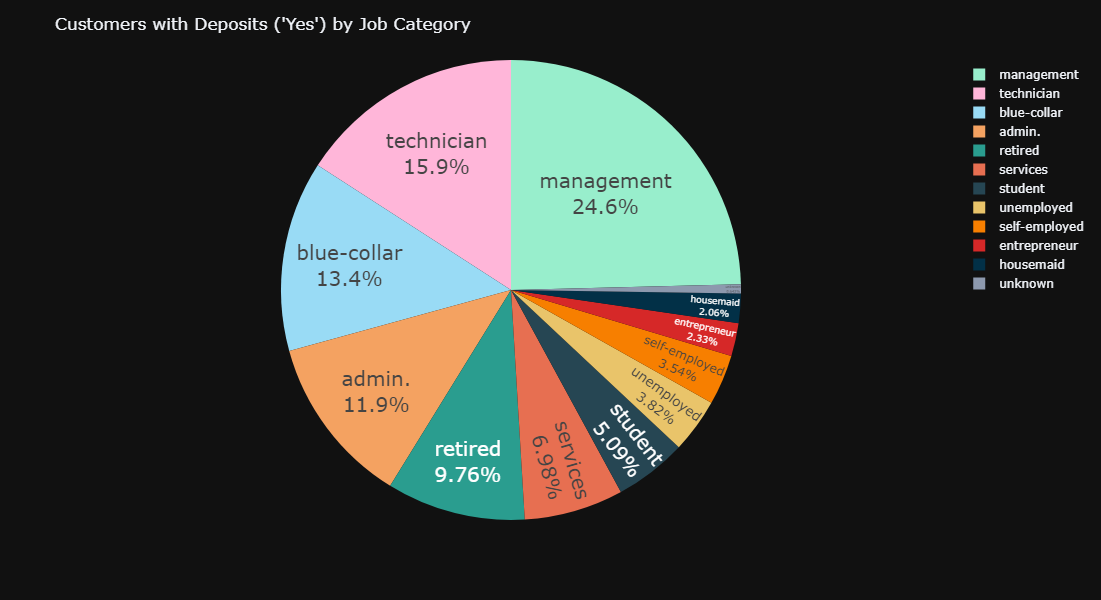

In [41]:
import plotly.express as px
from plotly.offline import iplot

# Filter the data for customers who have made a deposit ("yes")
deposit_yes = customer_data[customer_data["deposit"] == "yes"]

# Count the occurrences of each job category for customers with deposits marked "yes"
JobDeposits = deposit_yes["job"].value_counts()

# Create the pie chart
fig = px.pie(values=JobDeposits, names=JobDeposits.index,
             color_discrete_sequence=["#98EECC", "#FFB6D9", "#99DBF5", "#F4A261", "#2A9D8F", "#E76F51", "#264653", "#E9C46A", "#F77F00", "#D62828", "#023047", "#8D99AE"],
             template="plotly_dark"
)

# Update traces for better text display inside the pie slices
fig.update_traces(textposition='inside', textfont_size=20, textinfo='percent+label')

# Update layout to customize the chart size and show the legend
fig.update_layout(showlegend=True, width=1000, height=600, title_text="Customers with Deposits ('Yes') by Job Category")

# Show the pie chart
iplot(fig)


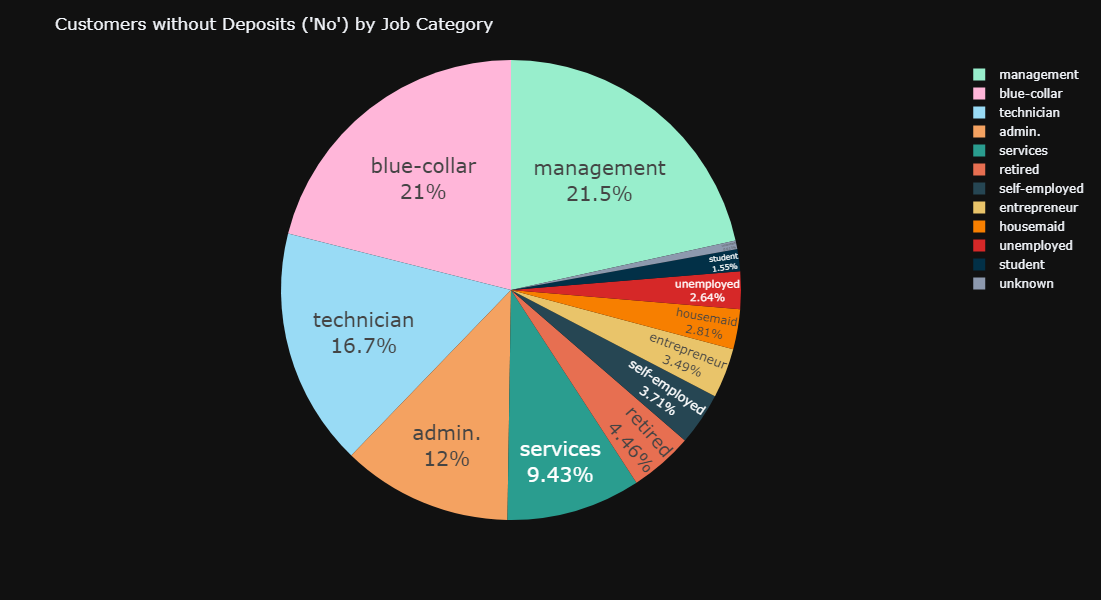

In [42]:
import plotly.express as px
from plotly.offline import iplot

# Filter the data for customers who have not made a deposit ("no")
deposit_no = customer_data[customer_data["deposit"] == "no"]

# Count the occurrences of each job category for customers with deposits marked "no"
JobDepositsNo = deposit_no["job"].value_counts()

# Create the pie chart
fig = px.pie(values=JobDepositsNo, names=JobDepositsNo.index,
             color_discrete_sequence=["#98EECC", "#FFB6D9", "#99DBF5", "#F4A261", "#2A9D8F", "#E76F51", "#264653", "#E9C46A", "#F77F00", "#D62828", "#023047", "#8D99AE"],
             template="plotly_dark"
)

# Update traces for better text display inside the pie slices
fig.update_traces(textposition='inside', textfont_size=20, textinfo='percent+label')

# Update layout to customize the chart size and show the legend
fig.update_layout(showlegend=True, width=1000, height=600, title_text="Customers without Deposits ('No') by Job Category")

# Show the pie chart
iplot(fig)


count
job                 
management      2566
blue-collar     1944
technician      1823
admin.          1334
services         923
retired          778
self-employed    405
student          360
unemployed       357
entrepreneur     328
housemaid        274
unknown           70

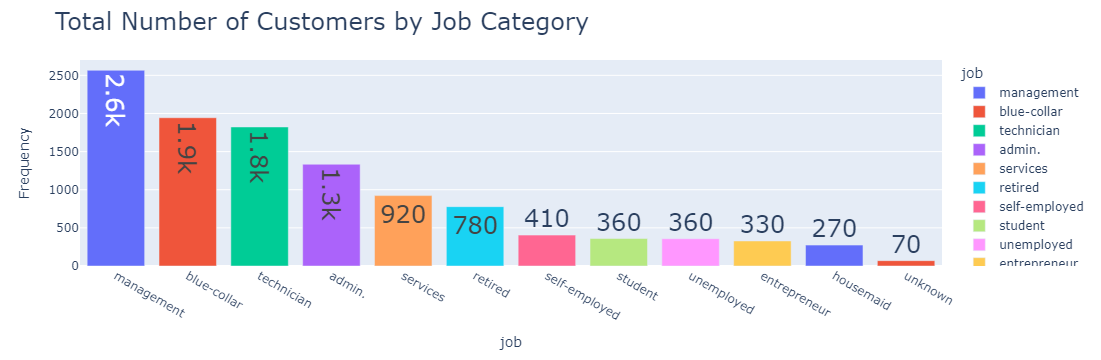

In [43]:
from plotly.offline import iplot
import plotly.express as px

# Get the counts of deposits per job
job_deposit_counts = customer_data.groupby('job')['deposit'].value_counts().unstack(fill_value=0)

# Summarize the total number of deposits ('yes' or 'no') for each job
total_deposits_by_job = customer_data['job'].value_counts()

# Display the summary
display(total_deposits_by_job.to_frame())

# Plot the bar chart for the total deposits by job
fig = px.bar(
    data_frame=total_deposits_by_job,
    x=total_deposits_by_job.index,  # Job categories
    y=total_deposits_by_job.values,  # Frequency of deposits
    color=total_deposits_by_job.index,  # Color by job
    text_auto=".2s",  # Add auto text formatting
    labels={"y": "Frequency", "index": "Job Categories"}  # Rename axes
)

# Update trace properties (font size, etc.)
fig.update_traces(textfont_size=24)

# Add a title to the plot
fig.update_layout(title_text="Total Number of Customers by Job Category", title_font_size=24)

# Show the plot using iplot
iplot(fig)


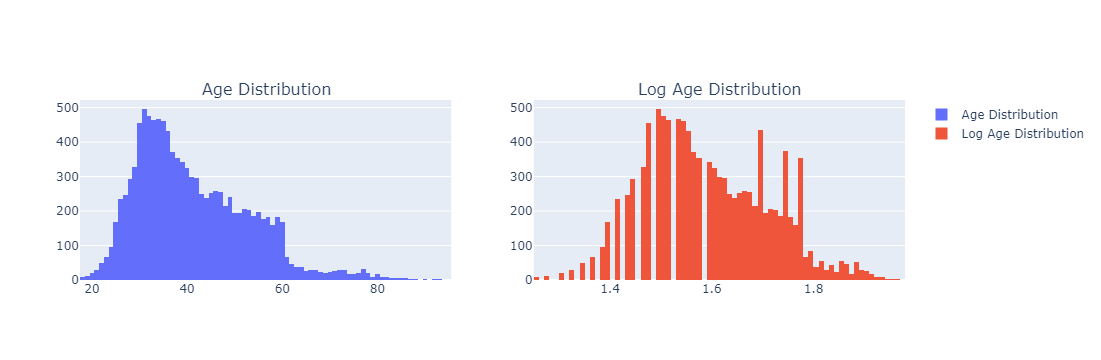

In [44]:
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(1,2,subplot_titles=('Age Distribution','Log Age Distribution'))
fig.append_trace(go.Histogram(x=customer_data['age'],
name='Age Distribution') ,1,1)
fig.append_trace(go.Histogram(x=np.log10(customer_data['age']),
name='Log Age Distribution') ,1,2)
iplot(dict(data=fig))

**Purpose:**

**Age Distribution:**

The first histogram shows the original distribution of ages in the dataset.

**Log Age Distribution:**

The second histogram shows the distribution of the logarithmic transformation of ages, which can help detect patterns or trends that might not be visible in the raw age data (such as clustering in lower age ranges).

This is useful for understanding both the raw distribution of ages and the transformed distribution

Number of Balance Lower Outliers: 4
Number of Balance Upper Outliers: 1052


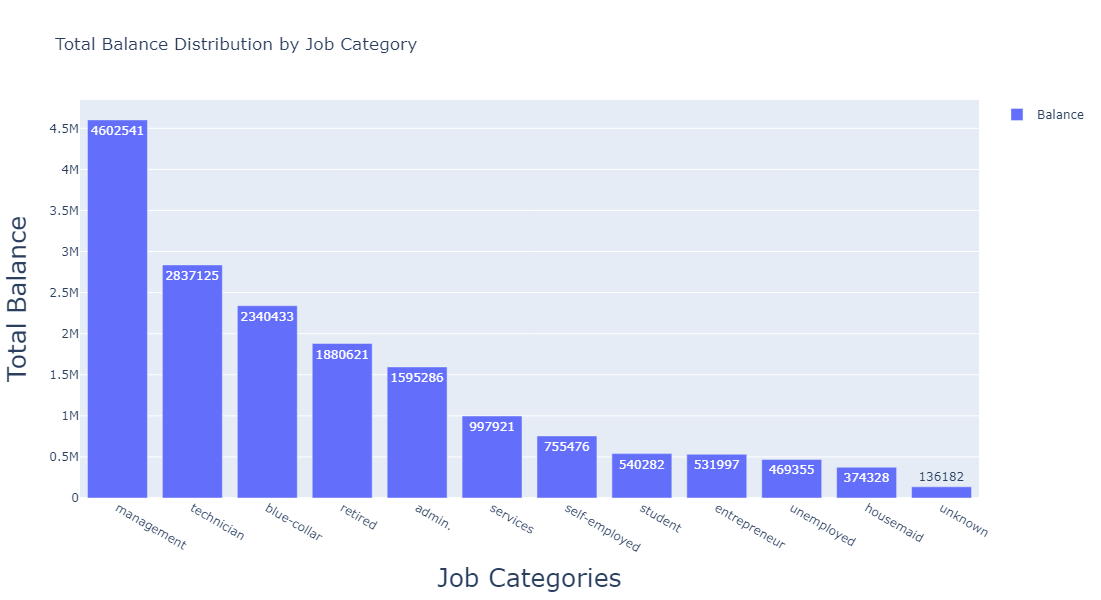

In [45]:
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot

# Calculate quartiles and IQR for the 'balance' column
Q25 = np.quantile(customer_data['balance'], q=0.25)
Q75 = np.quantile(customer_data['balance'], q=0.75)
IQR = Q75 - Q25
cut_off = IQR * 1.5

# Print number of outliers in the 'balance' column
print('Number of Balance Lower Outliers:', customer_data[customer_data['balance'] <= (Q25 - cut_off)]['balance'].count())
print('Number of Balance Upper Outliers:', customer_data[customer_data['balance'] >= (Q75 + cut_off)]['balance'].count())

# Group the dataset by 'job' and sum values, sorting by 'balance' for analysis
temp = customer_data.groupby('job').sum().sort_values('balance', ascending=False)

# Create bar chart for balance distribution by job category
data = [
    go.Bar(x=temp.index, y=temp['balance'], name='Balance', text=temp['balance'], textposition='auto')
]

# Define layout for the plot
layout = go.Layout(
    title='Total Balance Distribution by Job Category',
    xaxis=dict(title='Job Categories', titlefont=dict(size=25)),
    yaxis=dict(title='Total Balance', titlefont=dict(size=25)),
    showlegend=True,
    width=1300,
    height=600
)

# Create figure and plot
fig = go.Figure(data=data, layout=layout)
iplot(fig)



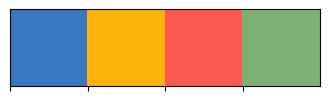

In [46]:
from matplotlib.colors import ListedColormap
colors = ["windows blue", "amber", "coral", "faded green"]
# plot them as a palette
sns.palplot(sns.xkcd_palette(colors))

In [47]:
customer_data

age          job  marital  education  balance  duration  campaign  \
0       59       admin.  married  secondary     2343      1042         1   
1       56       admin.  married  secondary       45      1467         1   
2       41   technician  married  secondary     1270      1389         1   
3       55     services  married  secondary     2476       579         1   
4       54       admin.  married   tertiary      184       673         2   
...    ...          ...      ...        ...      ...       ...       ...   
11157   33  blue-collar   single    primary        1       257         1   
11158   39     services  married  secondary      733        83         4   
11159   32   technician   single  secondary       29       156         2   
11160   43   technician  married  secondary        0         9         2   
11161   34   technician  married  secondary        0       628         1   

      poutcome deposit  
0      unknown     yes  
1      unknown     yes  
2      unknown     yes  
3      unknown     yes  
4      unknown     yes  
...        ...     ...  
11157  unknown      no  
11158  unknown      no  
11159  unknown      no  
11160  failure      no  
11161  unknown      no  

[11162 rows x 9 columns]

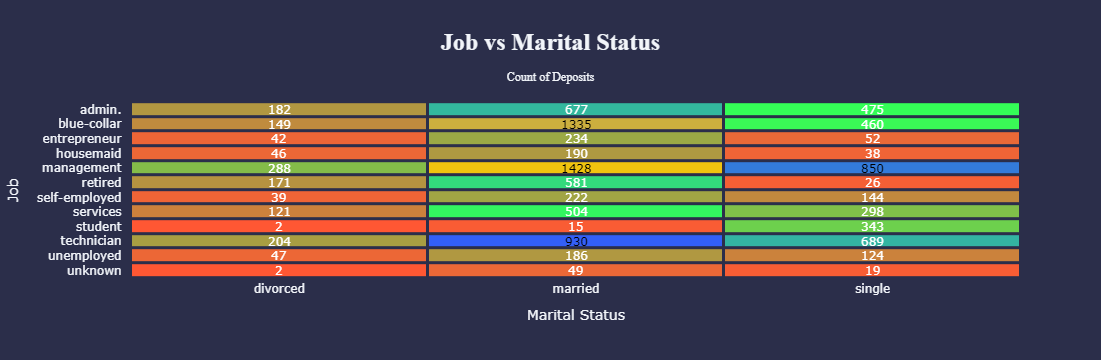

In [48]:
import pandas as pd
import plotly.figure_factory as ff

# Grouping the data
heatmap_data = customer_data.groupby(['job', 'marital']).size().unstack()

# Preparing the data for the heatmap
z = heatmap_data.values.tolist()
x = heatmap_data.columns.tolist()
y = heatmap_data.index.tolist()

# Define your color palette
colors = ['#FF5733', '#33FF57', '#3357FF', '#F1C40F']  
# Create a colorscale with normalized levels
cmap = [[i / (len(colors) - 1), color] for i, color in enumerate(colors)]

# Function to format title
def format_title(title, subtitle=None, subtitle_font=None, subtitle_font_size=None):
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-family: {subtitle_font}; font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

# Create the annotated heatmap
fig = ff.create_annotated_heatmap(
    z=z,
    x=x,
    y=y,
    xgap=3,
    ygap=3,
    colorscale=cmap  # Use your color palette of choice
)

# Update the layout
title = format_title('Job vs Marital Status', 'Count of Deposits', 'Proxima Nova', 12)
fig.update_layout(
    title_text=title,
    title_x=0.5,
    titlefont={'size': 24, 'family': 'Proxima Nova'},
    template='plotly_dark',
    paper_bgcolor='#2B2E4A',
    plot_bgcolor='#2B2E4A',
    xaxis=dict(side='bottom', showgrid=False, title='Marital Status'),
    yaxis=dict(showgrid=False, autorange='reversed', title='Job'),
)

# Show the figure
fig.show()


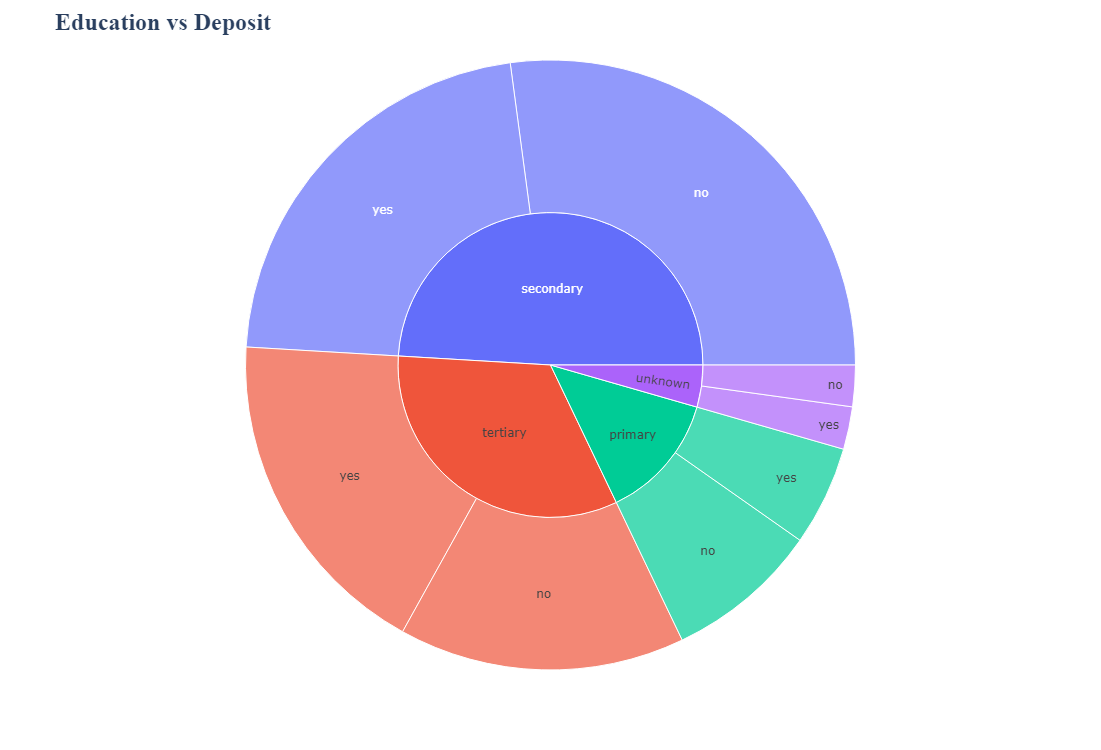

In [49]:
# data students performance
fig = px.sunburst(customer_data,
path=['education', 'deposit'])
fig.update_layout(title_text="<b>Education vs Deposit<b>",
titlefont={'size': 24, 'family':'Serif'},
width=750,
height=750,
)
fig.show()

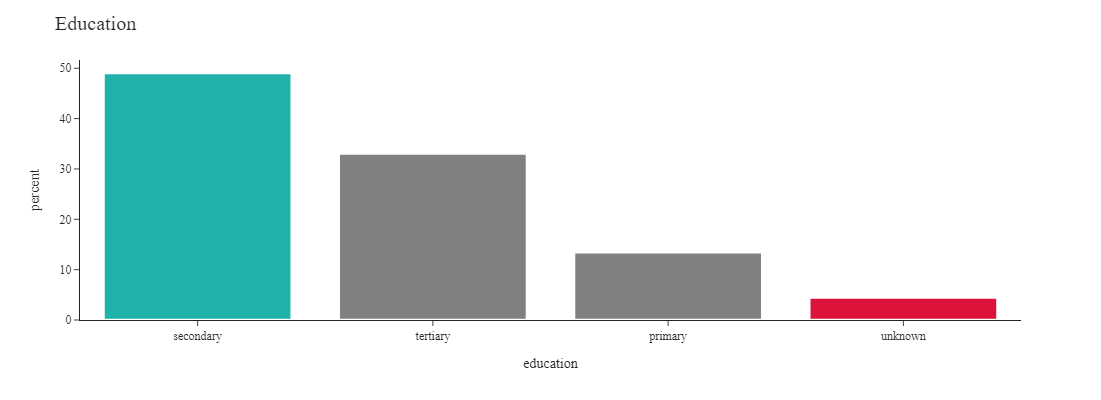

In [50]:
fig = px.histogram(customer_data, x="education",
width=600,
height=400,
histnorm='percent',
category_orders={
"education": ["secondary", "tertiary", "primary", "unknown"],
"deposit": ["yes", "no"]
},
color_discrete_map={
"yes": "RebeccaPurple", "no": "lightsalmon",
},
template="simple_white"
)
fig.update_layout(title="Education",
font_family="San Serif",
titlefont={'size': 20},
legend=dict(
orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )
).update_xaxes(categoryorder='total descending')
# custom color
colors = ['gray',] * 4
colors[3] = 'crimson'
colors[0] = 'lightseagreen'
fig.update_traces(marker_color=colors, marker_line_color=None,
marker_line_width=2.5, opacity=None)
fig.show()

Key Insights from the Education vs. Deposit Analysis:
Education's Role in Decision-Making: The plot reveals that customers with secondary and tertiary education levels make up the majority of term deposit subscribers. Customers with primary education or those whose education is unknown have significantly lower subscription rates. This suggests that higher education levels are correlated with increased financial literacy and, consequently, a higher likelihood to invest in term deposits.

Business Implications: This insight indicates that the bank’s marketing campaigns for term deposits could be tailored more effectively. Customers with higher education levels may respond better to product features related to long-term savings and investment potential. On the other hand, those with lower education levels may need simpler messaging or incentives to consider such products.

Strategic Recommendations: The bank could design targeted financial literacy programs or simplified product offerings for customers with primary education or unknown education levels. Personalized marketing strategies could further drive engagement among this segment, thereby improving conversion rates.

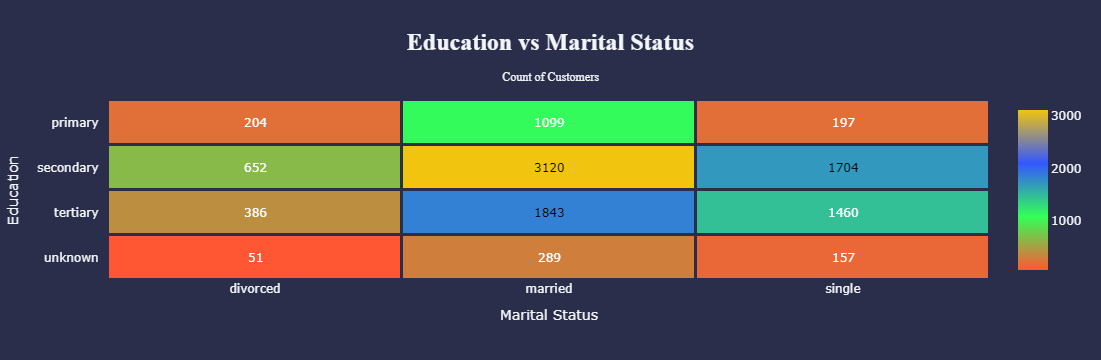

In [51]:
import pandas as pd
import plotly.figure_factory as ff

# Grouping the data by education and marital status
heatmap_data = customer_data.groupby(['education', 'marital']).size().unstack()

# Preparing the data for the heatmap
z = heatmap_data.values.tolist()   # Values for the heatmap
x = heatmap_data.columns.tolist()  # 'marital' categories
y = heatmap_data.index.tolist()    # 'education' categories

# Define your color palette for the heatmap
colors = ['#FF5733', '#33FF57', '#3357FF', '#F1C40F']  # Custom colors
# Create a colorscale with normalized levels
cmap = [[i / (len(colors) - 1), color] for i, color in enumerate(colors)]

# Function to format the title (from your previous code)
def format_title(title, subtitle=None, subtitle_font=None, subtitle_font_size=None):
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-family: {subtitle_font}; font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

# Create the annotated heatmap
fig = ff.create_annotated_heatmap(
    z=z,
    x=x,
    y=y,
    xgap=3,  # Adjust gap between cells on the x-axis
    ygap=3,  # Adjust gap between cells on the y-axis
    colorscale=cmap,  # Use your custom color palette
    showscale=True    # Display the color scale
)

# Format title
title = format_title('Education vs Marital Status', 'Count of Customers', 'Proxima Nova', 12)

# Update the layout
fig.update_layout(
    title_text=title,
    title_x=0.5,
    titlefont={'size': 24, 'family': 'Proxima Nova'},
    template='plotly_dark',  # Keep dark background similar to the histogram
    paper_bgcolor='#2B2E4A',  # Dark background for the paper
    plot_bgcolor='#2B2E4A',   # Dark background for the plot
    xaxis=dict(side='bottom', showgrid=False, title='Marital Status'),  # No grid lines
    yaxis=dict(showgrid=False, autorange='reversed', title='Education')  # Reversed y-axis for better reading
)

# Show the figure
fig.show()


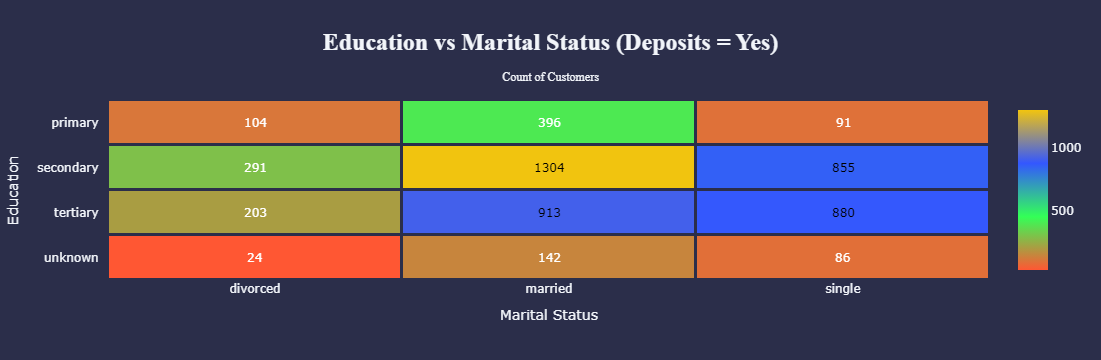

In [52]:
import pandas as pd
import plotly.figure_factory as ff

# Filter the data for customers with deposits marked as 'yes'
yes_deposit_data = customer_data[customer_data['deposit'] == 'yes']

# Grouping the filtered data by education and marital status
heatmap_data = yes_deposit_data.groupby(['education', 'marital']).size().unstack()

# Preparing the data for the heatmap
z = heatmap_data.values.tolist()   # Values for the heatmap
x = heatmap_data.columns.tolist()  # 'marital' categories
y = heatmap_data.index.tolist()    # 'education' categories

# Define your color palette for the heatmap
colors = ['#FF5733', '#33FF57', '#3357FF', '#F1C40F']  # Custom colors
# Create a colorscale with normalized levels
cmap = [[i / (len(colors) - 1), color] for i, color in enumerate(colors)]

# Function to format the title (from your previous code)
def format_title(title, subtitle=None, subtitle_font=None, subtitle_font_size=None):
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-family: {subtitle_font}; font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

# Create the annotated heatmap
fig = ff.create_annotated_heatmap(
    z=z,
    x=x,
    y=y,
    xgap=3,  # Adjust gap between cells on the x-axis
    ygap=3,  # Adjust gap between cells on the y-axis
    colorscale=cmap,  # Use your custom color palette
    showscale=True    # Display the color scale
)

# Format title
title = format_title('Education vs Marital Status (Deposits = Yes)', 'Count of Customers', 'Proxima Nova', 12)

# Update the layout
fig.update_layout(
    title_text=title,
    title_x=0.5,
    titlefont={'size': 24, 'family': 'Proxima Nova'},
    template='plotly_dark',  # Keep dark background similar to the histogram
    paper_bgcolor='#2B2E4A',  # Dark background for the paper
    plot_bgcolor='#2B2E4A',   # Dark background for the plot
    xaxis=dict(side='bottom', showgrid=False, title='Marital Status'),  # No grid lines
    yaxis=dict(showgrid=False, autorange='reversed', title='Education')  # Reversed y-axis for better reading
)

# Show the figure
fig.show()


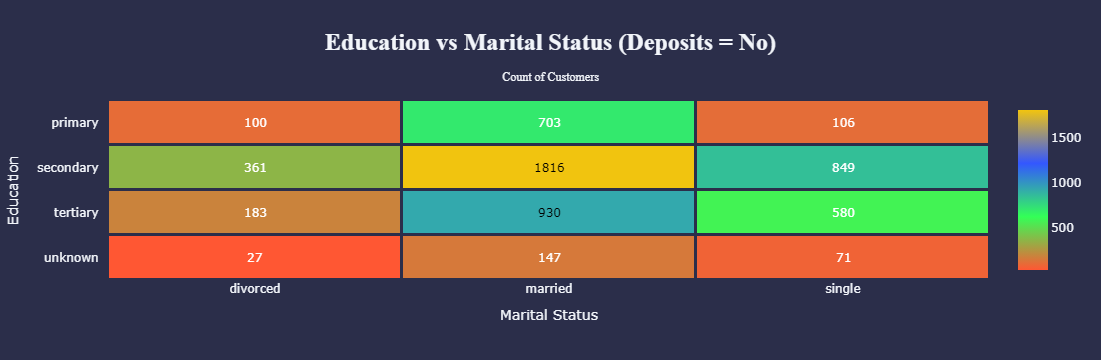

In [53]:
import pandas as pd
import plotly.figure_factory as ff

# Filter the data for customers with deposits marked as 'yes'
yes_deposit_data = customer_data[customer_data['deposit'] == 'no']

# Grouping the filtered data by education and marital status
heatmap_data = yes_deposit_data.groupby(['education', 'marital']).size().unstack()

# Preparing the data for the heatmap
z = heatmap_data.values.tolist()   # Values for the heatmap
x = heatmap_data.columns.tolist()  # 'marital' categories
y = heatmap_data.index.tolist()    # 'education' categories

# Define your color palette for the heatmap
colors = ['#FF5733', '#33FF57', '#3357FF', '#F1C40F']  # Custom colors
# Create a colorscale with normalized levels
cmap = [[i / (len(colors) - 1), color] for i, color in enumerate(colors)]

# Function to format the title (from your previous code)
def format_title(title, subtitle=None, subtitle_font=None, subtitle_font_size=None):
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-family: {subtitle_font}; font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

# Create the annotated heatmap
fig = ff.create_annotated_heatmap(
    z=z,
    x=x,
    y=y,
    xgap=3,  # Adjust gap between cells on the x-axis
    ygap=3,  # Adjust gap between cells on the y-axis
    colorscale=cmap,  # Use your custom color palette
    showscale=True    # Display the color scale
)

# Format title
title = format_title('Education vs Marital Status (Deposits = No)', 'Count of Customers', 'Proxima Nova', 12)

# Update the layout
fig.update_layout(
    title_text=title,
    title_x=0.5,
    titlefont={'size': 24, 'family': 'Proxima Nova'},
    template='plotly_dark',  # Keep dark background similar to the histogram
    paper_bgcolor='#2B2E4A',  # Dark background for the paper
    plot_bgcolor='#2B2E4A',   # Dark background for the plot
    xaxis=dict(side='bottom', showgrid=False, title='Marital Status'),  # No grid lines
    yaxis=dict(showgrid=False, autorange='reversed', title='Education')  # Reversed y-axis for better reading
)

# Show the figure
fig.show()


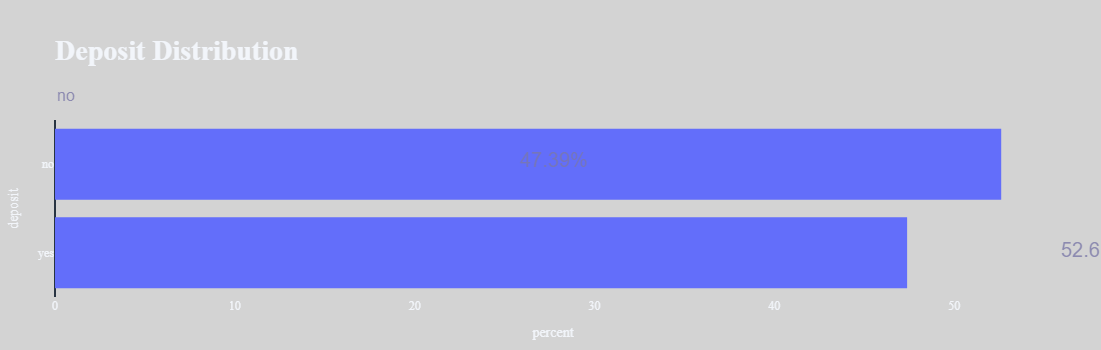

In [54]:
import plotly.express as px

# Color palette
colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

# Creating the histogram with the 'deposit' column
fig = px.histogram(customer_data, y="deposit",
                   orientation='h',
                   width=800,
                   height=350,
                   histnorm='percent',
                   template="plotly_dark")

# Updating layout
fig.update_layout(
    title="<b>Deposit Distribution<b>",
    font_family="San Serif",
    bargap=0.2,
    barmode='group',
    titlefont={'size': 28},
    paper_bgcolor='lightgray',
    plot_bgcolor='lightgray',
    legend=dict(
        orientation="v",
        y=1,
        yanchor="top",
        x=1.250,
        xanchor="right"
    )
)

# Adding annotations
annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=0.0, y=1.2,
                        text='no',
                        font=dict(family='Arial', size=16, color=colors[2]),
                        showarrow=False))
annotations.append(dict(xref='paper', yref='paper',
                        x=0.50, y=0.85,
                        text='47.39%',
                        font=dict(family='Arial', size=20, color=colors[2]),
                        showarrow=False))
annotations.append(dict(xref='paper', yref='paper',
                        x=1.08, y=0.19,
                        text='52.61%',
                        font=dict(family='Arial', size=20, color=colors[2]),
                        showarrow=False))

fig.update_layout(
    autosize=False,
    width=800,
    height=350,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=120,
    ),
    annotations=annotations
)

# Removing gridlines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Display the figure
fig.show()


In [55]:
customer_data['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [56]:
data = pd.read_csv('C:/Users/Collins PC/Downloads/bank_marketting_campaign/bank.csv')
data

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1         0  unknown   
1       unknown    5   may      1467         1     -1         0  unknown   
2       unknown    5   may      1389         1     -1         0  unknown   
3       unknown    5   may       579         1     -1         0  unknown   
4       unknown    5   may       673         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[11162 rows x 17 columns]

In [57]:
import pandas as pd
import datetime as dt

# Convert 'day' and 'month' into a datetime column
data['date'] = pd.to_datetime(data['day'].astype(str) + '-' + data['month'] + '-2023', format='%d-%b-%Y')

# Today's date (for reference)
today = dt.datetime.today()

# Recency: Based on 'pdays' (handling -1 as a large number like 999)
data['Recency'] = data['pdays'].apply(lambda x: x if x != -1 else 999)

# Frequency: Using 'campaign' to represent how many times the customer was contacted
data['Frequency'] = data['campaign']

# Monetary: Using 'balance' to represent the monetary value
data['Monetary'] = data['balance']

# Aggregating RFM metrics per customer (assuming each age is unique for simplicity)
rfm = data.groupby('age').agg({
    'Recency': 'min',      # Minimum recency for the latest interaction
    'Frequency': 'sum',    # Sum of campaign interactions
    'Monetary': 'sum'      # Total balance as monetary value
}).reset_index()

# Create RFM segments by quartiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine RFM scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Segment customers based on RFM score
def assign_segment(score):
    if score == '444':
        return 'Best Customers'
    elif score[0] == '4':  # Recency is high
        return 'Recent Customers'
    elif score[1] == '4':  # Frequency is high
        return 'Loyal Customers'
    elif score[2] == '4':  # Monetary is high
        return 'High Monetary Customers'
    elif score in ['111', '211', '311']:  # Low across all metrics
        return 'Low Value Customers'
    else:
        return 'Others'

rfm['Segment'] = rfm['RFM_Score'].apply(assign_segment)

# Display the result
print(rfm)

# Optionally save the result to a CSV
rfm.to_csv('RFM_Customer_Segmentation.csv', index=False)

    age  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
0    18       93         13      1896       1       1       1       111   
1    19      180         25      3681       1       1       1       111   
2    20       91         40     20264       2       2       1       221   
3    21       89         59     31926       2       2       1       221   
4    22       38         79     40559       3       2       1       321   
..  ...      ...        ...       ...     ...     ...     ...       ...   
71   89      999          5       553       1       1       1       111   
72   90      999          4       713       1       1       1       111   
73   92       96          7      1550       1       1       1       111   
74   93       13          4      1550       3       1       1       311   
75   95      999         17      2282       1       1       1       111   

                Segment  
0   Low Value Customers  
1   Low Value Customers  
2                Othe

In [58]:
rfm

age  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
0    18       93         13      1896       1       1       1       111   
1    19      180         25      3681       1       1       1       111   
2    20       91         40     20264       2       2       1       221   
3    21       89         59     31926       2       2       1       221   
4    22       38         79     40559       3       2       1       321   
..  ...      ...        ...       ...     ...     ...     ...       ...   
71   89      999          5       553       1       1       1       111   
72   90      999          4       713       1       1       1       111   
73   92       96          7      1550       1       1       1       111   
74   93       13          4      1550       3       1       1       311   
75   95      999         17      2282       1       1       1       111   

                Segment  
0   Low Value Customers  
1   Low Value Customers  
2                Others  
3                Others  
4                Others  
..                  ...  
71  Low Value Customers  
72  Low Value Customers  
73  Low Value Customers  
74  Low Value Customers  
75  Low Value Customers  

[76 rows x 9 columns]

In [59]:
rfm['Segment'].value_counts()

Segment
Others                     26
Low Value Customers        16
Recent Customers           13
Loyal Customers            10
Best Customers              7
High Monetary Customers     4
Name: count, dtype: int64

In [60]:
rfm['RFM_Score'].value_counts()

RFM_Score
111    13
222     9
444     7
433     7
344     6
333     3
334     3
122     3
443     2
343     2
232     2
221     2
233     2
422     2
311     2
211     1
412     1
322     1
212     1
234     1
223     1
434     1
243     1
244     1
321     1
113     1
Name: count, dtype: int64

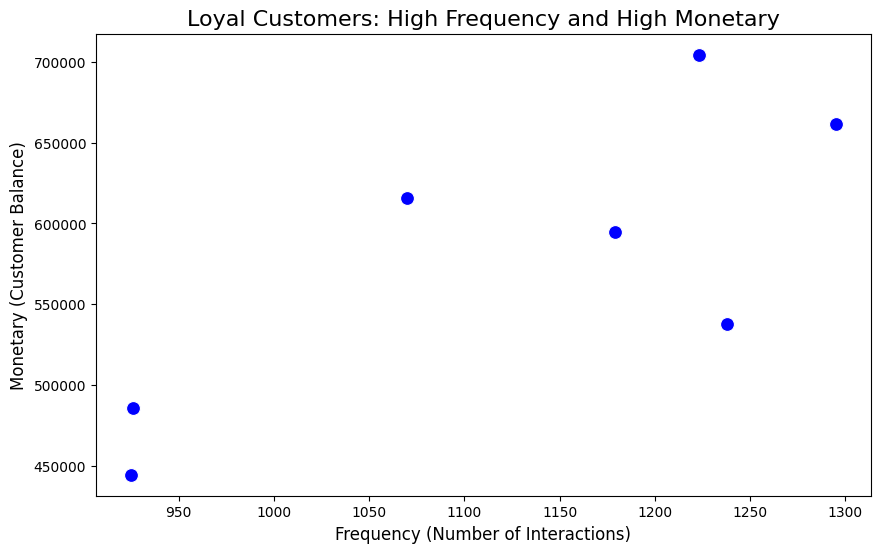

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming rfm DataFrame already exists with 'F_Score' and 'M_Score'
# Segmenting Loyal Customers
loyal_customers = rfm[(rfm['RFM_Score'] == '444') | (['RFM_Score'] == '433') | (['RFM_Score'] == '344')]

# Plotting Loyal Customers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', data=loyal_customers, color='blue', s=100)

# Adding titles and labels
plt.title('Loyal Customers: High Frequency and High Monetary', fontsize=16)
plt.xlabel('Frequency (Number of Interactions)', fontsize=12)
plt.ylabel('Monetary (Customer Balance)', fontsize=12)

# Display the plot
plt.show()


Key Insights from Loyal Customer Segment:
Loyal Customer Behavior: The scatter plot of Frequency vs. Monetary clearly shows that loyal customers tend to engage with the bank frequently and have high monetary contributions. This indicates a strong relationship between the bank and these customers, suggesting they are satisfied with the bank's offerings and may be prime candidates for upselling opportunities.

Business Implications: These loyal customers are essential to the bank’s revenue and retention strategies. Focusing on this group can help the bank maintain its strong customer base while also exploring opportunities to increase customer lifetime value through premium products, personalized services, or rewards programs.

Strategic Recommendations: The bank can further enhance loyalty by offering exclusive promotions, personalized financial advice, or reward programs to these customers. Such actions would not only reinforce their loyalty but could also drive higher revenue growth by deepening customer relationships.

In [62]:
loyal_customers

age  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
12   30        6       1179    594468       4       4       4       444   
13   31        2       1295    661376       4       4       4       444   
14   32        4       1223    704363       4       4       4       444   
16   34        1       1070    615477       4       4       4       444   
17   35        5       1238    537845       4       4       4       444   
20   38        1        926    486068       4       4       4       444   
24   42        1        925    444490       4       4       4       444   

           Segment  
12  Best Customers  
13  Best Customers  
14  Best Customers  
16  Best Customers  
17  Best Customers  
20  Best Customers  
24  Best Customers

In [63]:
# Filter "Others" segment and save it in a new DataFrame
others_segment = rfm[rfm['Segment'] == 'Others']

In [64]:
others_segment

age  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
2    20       91         40     20264       2       2       1       221   
3    21       89         59     31926       2       2       1       221   
4    22       38         79     40559       3       2       1       321   
5    23       83        136     66006       2       3       2       232   
6    24       80        228    140024       2       3       2       232   
7    25       10        349    161797       3       3       3       333   
29   47       10        605    379871       3       3       3       333   
34   52       48        580    343639       3       3       3       333   
36   54       70        452    277483       2       3       3       233   
41   59       56        432    301095       2       3       3       233   
43   61       91        130    266878       2       2       3       223   
45   63       91         84     88671       2       2       2       222   
46   64       89         65     81518       2       2       2       222   
47   65       92         38     81474       1       2       2       122   
48   66       87         59     42964       2       2       2       222   
49   67       84         64     51366       2       2       2       222   
51   69       56         36     54154       2       2       2       222   
52   70       88         30     49003       2       1       2       212   
53   71       91         54     74787       2       2       2       222   
54   72       64         56     53442       2       2       2       222   
55   73       40         64     51668       3       2       2       322   
56   74       93         37     71374       1       2       2       122   
57   75       94         38     86341       1       2       2       122   
58   76       87         39     53909       2       2       2       222   
59   77       60         61    100104       2       2       2       222   
66   84       92          8    167808       1       1       3       113   

   Segment  
2   Others  
3   Others  
4   Others  
5   Others  
6   Others  
7   Others  
29  Others  
34  Others  
36  Others  
41  Others  
43  Others  
45  Others  
46  Others  
47  Others  
48  Others  
49  Others  
51  Others  
52  Others  
53  Others  
54  Others  
55  Others  
56  Others  
57  Others  
58  Others  
59  Others  
66  Others

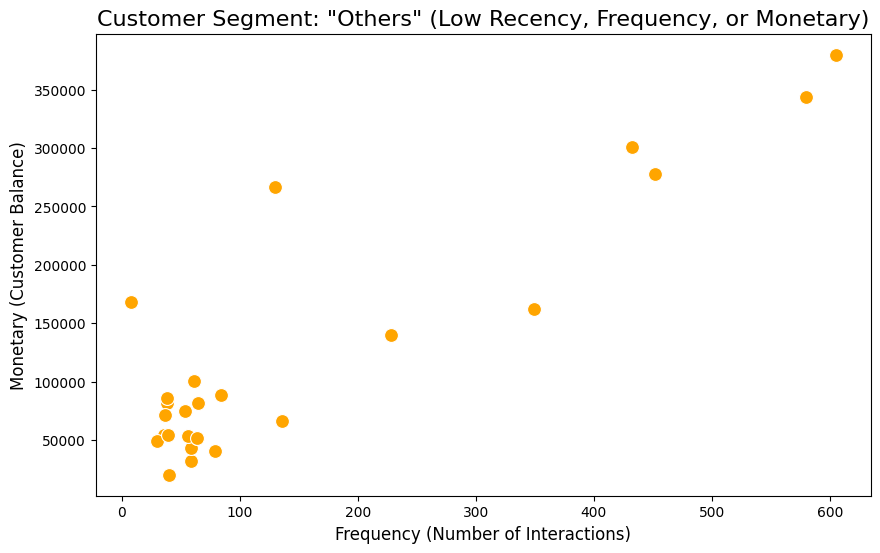

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'rfm' DataFrame already exists and 'others_segment' has been filtered

# Filter "Others" segment (if not already done)
others_segment = rfm[rfm['Segment'] == 'Others']

# Plotting the "Others" Segment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', data=others_segment, color='orange', s=100)

# Adding titles and labels
plt.title('Customer Segment: "Others" (Low Recency, Frequency, or Monetary)', fontsize=16)
plt.xlabel('Frequency (Number of Interactions)', fontsize=12)
plt.ylabel('Monetary (Customer Balance)', fontsize=12)

# Display the plot
plt.show()


Key Business Insights from RFM Analysis & "Others" Segment:
Customer Segment Insights: The “Others” segment, visualized through a scatter plot, represents customers with low recency, frequency, or monetary value. These are likely to be disengaged or inactive customers who haven't interacted much with the bank recently or who may not hold significant balances. Understanding this segment can help the bank in designing targeted re-engagement strategies, focusing on improving their experience and offering personalized incentives.

Segmentation Value: By focusing on low-engagement customers, the bank can identify patterns that contribute to reduced interactions and devise retention strategies to prevent churn. Furthermore, increasing engagement within this group could lead to improved monetary contributions from underperforming segments.

Strategic Decisions: Insights from this segment highlight the need for improved communication and offers that cater to the financial habits of these low-engagement customers. This analysis provides a starting point for more effective reactivation campaigns, personalized follow-ups, and possible product adjustments.

In [66]:
data

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day  ... duration  campaign  pdays  previous  poutcome  \
0       unknown    5  ...     1042         1     -1         0   unknown   
1       unknown    5  ...     1467         1     -1         0   unknown   
2       unknown    5  ...     1389         1     -1         0   unknown   
3       unknown    5  ...      579         1     -1         0   unknown   
4       unknown    5  ...      673         2     -1         0   unknown   
...         ...  ...  ...      ...       ...    ...       ...       ...   
11157  cellular   20  ...      257         1     -1         0   unknown   
11158   unknown   16  ...       83         4     -1         0   unknown   
11159  cellular   19  ...      156         2     -1         0   unknown   
11160  cellular    8  ...        9         2    172         5   failure   
11161  cellular    9  ...      628         1     -1         0   unknown   

      deposit       date Recency  Frequency  Monetary  
0         yes 2023-05-05     999          1      2343  
1         yes 2023-05-05     999          1        45  
2         yes 2023-05-05     999          1      1270  
3         yes 2023-05-05     999          1      2476  
4         yes 2023-05-05     999          2       184  
...       ...        ...     ...        ...       ...  
11157      no 2023-04-20     999          1         1  
11158      no 2023-06-16     999          4       733  
11159      no 2023-08-19     999          2        29  
11160      no 2023-05-08     172          2         0  
11161      no 2023-07-09     999          1         0  

[11162 rows x 21 columns]

---
# Feature Engineering
---

### Understand the data

In [67]:
col = list(data.columns)
categorical_features = []
numerical_features = []

for i in col:
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()
    unique_values = data[i].unique()
    if i in categorical_features :
        categorical_features.append(i)
    else:
        numerical_features.append(i)
    
    print(f"Column: {i}")
    print(f"Unique Values ({len(unique_values)}): {unique_values}")
    print("-" * 50)

print('Categorical Features:', *categorical_features)
print('Numerical Features:', *numerical_features)


Column: age
Unique Values (76): [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
--------------------------------------------------
Column: job
Unique Values (12): ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
--------------------------------------------------
Column: marital
Unique Values (3): ['married' 'single' 'divorced']
--------------------------------------------------
Column: education
Unique Values (4): ['secondary' 'tertiary' 'primary' 'unknown']
--------------------------------------------------
Column: default
Unique Values (2): ['no' 'yes']
--------------------------------------------------
Column: balance
Unique Values (3805): [2343   45 1270 ... 1594 2593 -134]
---------------------------

**Summary Report:** 

**Customer Dataset Overview**

The dataset consists of customer demographic, financial, and engagement-related information. Below is an overview of the key features, including their unique values and distribution.

**1. Categorical Features**

**Job:**

This column contains 12 distinct job categories, such as 'admin.', 'technician', 'management', and 'retired', with an 'unknown' category present.

**Marital Status:**

There are 3 marital status values: 'married', 'single', and 'divorced'.

**Education:**

Educational backgrounds are categorized into 4 groups: 'secondary', 'tertiary', 'primary', and 'unknown'.

**Default:**

Binary feature indicating if the customer has credit default, with values 'yes' and 'no'.

**Housing:**

Indicates whether the customer has a housing loan ('yes' or 'no').

**Loan:**

A binary column showing whether the customer has taken a personal loan ('yes' or 'no').

**Contact:**

Represents the method of contact during campaigns: 'unknown', 'cellular', or 'telephone'.

**Month:**

The month in which the campaign contact was made, ranging across 12 months from 'jan' to 'dec'.

**Poutcome:**

The outcome of previous marketing campaigns, with 4 possible values: 'unknown', 'other', 'failure', and 'success'.

**Deposit:**

The target variable indicating whether the customer subscribed to a term deposit ('yes' or 'no').

**2. Numerical Features**


**Age:**

Ranges from 18 to 95, with 76 unique values, indicating a wide age distribution.

**Balance:**

Represents the bank balance of customers, with 3,805 unique values, including both positive and negative balances.

**Day:**

The day of the month the contact was made, with values ranging from 1 to 31.

**Duration:**

The length of the last contact, with 1,428 unique durations, reflecting significant variability.

**Campaign:**

The number of contacts made during the current campaign, ranging from 1 to 63, with 36 unique values.

**Pdays:**

Number of days since the client was last contacted from a previous campaign, with 472 unique values.

**Previous:**

Indicates the number of contacts performed before the current campaign, with values ranging from 0 to 58.

**Date:**

Dates span from May 5, 2024, to December 13, 2024, representing when each customer interaction occurred.

**Recency:**

Similar to pdays, with values ranging from 1 to 999, and 472 unique values indicating time since the last contact.

**Frequency:**

The number of contacts made to the customer, ranging from 1 to 63 across 36 unique values.

**Monetary:**

Similar to balance, this feature represents transactional amounts, with a wide range and 3,805 unique values.

**Key Insights:**

**Demographics:**

The customer base spans diverse ages and occupations, with a notable presence of unknown values for job and education.

**Campaign Engagement:**

Contact methods vary, with both short-term and long-term interactions represented.

**Financial Attributes:**

Customers have a broad range of balances, indicating varying financial standing, which may affect their deposit decisions.

This dataset provides a wealth of information, useful for segmentation, financial profiling, and predictive modeling to optimize marketing campaigns and understand customer behavior.








In [68]:
# Select only the categorical columns
categorical_data = data[categorical_features]

# statistics about categorical data 
description = categorical_data.describe()

description

# printing more details specific to categorical data:
for column in categorical_features:
    print(f"\nUnique values in {column}:")
    print(data[column].value_counts())


Unique values in job:
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

Unique values in marital:
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

Unique values in education:
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

Unique values in default:
default
no     10994
yes      168
Name: count, dtype: int64

Unique values in housing:
housing
no     5881
yes    5281
Name: count, dtype: int64

Unique values in loan:
loan
no     9702
yes    1460
Name: count, dtype: int64

Unique values in contact:
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

Unique values in month:
month
may    2824
aug    1519
jul    1514
j

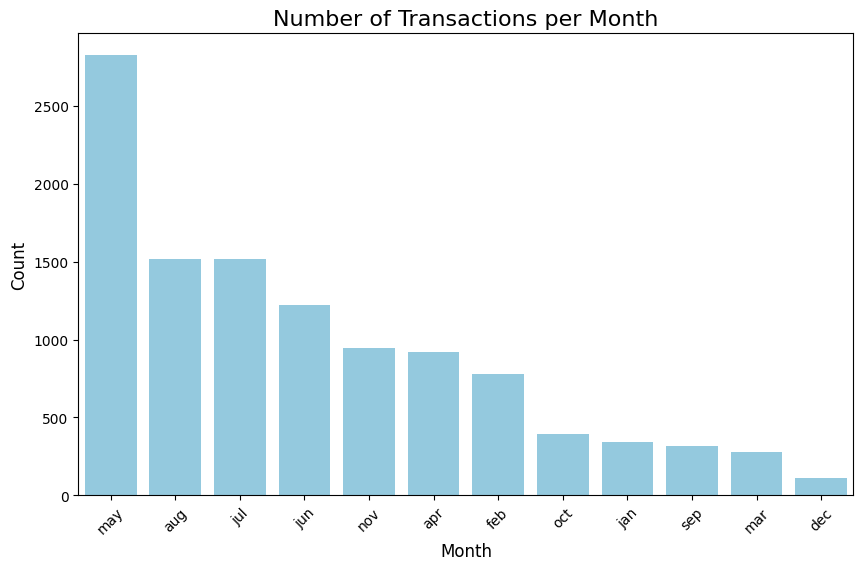

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data for the month counts
month_counts = pd.DataFrame({
    'month': ['may', 'aug', 'jul', 'jun', 'nov', 'apr', 'feb', 'oct', 'jan', 'sep', 'mar', 'dec'],
    'count': [2824, 1519, 1514, 1222, 943, 923, 776, 392, 344, 319, 276, 110]
})

# Plotting the month counts
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='count', data=month_counts, color='skyblue')  # Using a single color instead of palette

# Adding titles and labels
plt.title('Number of Transactions per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [70]:
categorical_data.describe()

job  marital  education default housing   loan   contact  \
count        11162    11162      11162   11162   11162  11162     11162   
unique          12        3          4       2       2      2         3   
top     management  married  secondary      no      no     no  cellular   
freq          2566     6351       5476   10994    5881   9702      8042   

        month poutcome deposit  
count   11162    11162   11162  
unique     12        4       2  
top       may  unknown      no  
freq     2824     8326    5873

**Bank Marketing Campaign Analysis**

**Objective:**

The goal of this project is to analyze customer data from a bank’s marketing campaign to understand patterns and factors influencing the success of deposit subscriptions. The dataset consists of several categorical variables related to customer demographics, financial behavior, and marketing outreach, along with a target variable indicating whether the customer subscribed to a deposit.

**Dataset Overview:**

The dataset contains 11,162 records, each representing a customer contacted during the marketing campaign. The variables included in the dataset provide insight into customer demographics, financial history, and engagement with the bank’s marketing efforts.


**Key Variables:**


**Job:**

Represents the customer’s profession, with 12 unique job categories (e.g., management, technician, blue-collar).

**Most common: Management (2,566 customers)**

**Marital Status:**

Indicates the marital status of the customer, with three categories (single, married, divorced).

**Most common: Married (6,351 customers)**

**Education:**

Level of education, categorized into four levels (primary, secondary, tertiary, unknown).

**Most common: Secondary education (5,476 customers)**

**Default:**

Indicates whether the customer has credit in default (yes or no).

**Most common: No (10,994 customers)**


**Housing Loan:**

Whether the customer has a housing loan (yes or no).

**Most common: No (5,881 customers)**

**Personal Loan:**

Indicates whether the customer has a personal loan (yes or no).

**Most common: No (9,702 customers)**

**Contact Method:**

Type of communication used to contact the customer (cellular, telephone, unknown).

**Most common: Cellular (8,042 customers)**


**Month:**

The month during which the customer was last contacted in the campaign, with 12 unique months (e.g., May, July, September).

**Most common: May (2,824 customers)**

**Previous Campaign Outcome (Poutcome):**

Outcome of the previous marketing campaign (success, failure, unknown, other).

**Most common: Unknown (8,326 customers)**

**Deposit Subscription (Target Variable):**

Indicates whether the customer subscribed to a deposit during the current campaign (yes or no).

**Most common: No (5,873 customers)**

**Analysis Strategy:**


**Exploratory Data Analysis (EDA):**

Examine the distribution of the categorical variables and explore any correlations between customer characteristics and their likelihood of subscribing to a deposit.

**Data Preprocessing:**

Handle missing values, encode categorical variables, and prepare the data for machine learning models.

**Predictive Modeling:**

Use classification algorithms such as logistic regression, decision trees, and random forests to predict whether a customer will subscribe to a deposit.

**Insights and Recommendations:**

Provide actionable insights for improving future marketing campaigns based on key influencing factors such as customer profession, previous campaign outcomes, and contact methods.

**Conclusion:**

This project will help the bank better understand customer segments that are more likely to subscribe to deposits, optimize targeting strategies, and improve the overall efficiency of future marketing campaigns.

In [71]:
categorical_data

job  marital  education default housing loan   contact month  \
0           admin.  married  secondary      no     yes   no   unknown   may   
1           admin.  married  secondary      no      no   no   unknown   may   
2       technician  married  secondary      no     yes   no   unknown   may   
3         services  married  secondary      no     yes   no   unknown   may   
4           admin.  married   tertiary      no      no   no   unknown   may   
...            ...      ...        ...     ...     ...  ...       ...   ...   
11157  blue-collar   single    primary      no     yes   no  cellular   apr   
11158     services  married  secondary      no      no   no   unknown   jun   
11159   technician   single  secondary      no      no   no  cellular   aug   
11160   technician  married  secondary      no      no  yes  cellular   may   
11161   technician  married  secondary      no      no   no  cellular   jul   

      poutcome deposit  
0      unknown     yes  
1      unknown     yes  
2      unknown     yes  
3      unknown     yes  
4      unknown     yes  
...        ...     ...  
11157  unknown      no  
11158  unknown      no  
11159  unknown      no  
11160  failure      no  
11161  unknown      no  

[11162 rows x 10 columns]

In [72]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Apply the mapping to convert the 'month' column to numerical values
categorical_data['month_numerical'] = categorical_data['month'].map(month_mapping)

# View the updated DataFrame
categorical_data

job  marital  education default housing loan   contact month  \
0           admin.  married  secondary      no     yes   no   unknown   may   
1           admin.  married  secondary      no      no   no   unknown   may   
2       technician  married  secondary      no     yes   no   unknown   may   
3         services  married  secondary      no     yes   no   unknown   may   
4           admin.  married   tertiary      no      no   no   unknown   may   
...            ...      ...        ...     ...     ...  ...       ...   ...   
11157  blue-collar   single    primary      no     yes   no  cellular   apr   
11158     services  married  secondary      no      no   no   unknown   jun   
11159   technician   single  secondary      no      no   no  cellular   aug   
11160   technician  married  secondary      no      no  yes  cellular   may   
11161   technician  married  secondary      no      no   no  cellular   jul   

      poutcome deposit  month_numerical  
0      unknown     yes                5  
1      unknown     yes                5  
2      unknown     yes                5  
3      unknown     yes                5  
4      unknown     yes                5  
...        ...     ...              ...  
11157  unknown      no                4  
11158  unknown      no                6  
11159  unknown      no                8  
11160  failure      no                5  
11161  unknown      no                7  

[11162 rows x 11 columns]

In [73]:
# Select only the categorical columns
numerical_data = data[numerical_features]

# statistics about categorical data 
numeric_description = numerical_data.describe()

numeric_description

# printing more details specific to categorical data:
for column in numerical_features:
    print(f"\nUnique values in {column}:")
    print(data[column].value_counts())


Unique values in age:
age
31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: count, Length: 76, dtype: int64

Unique values in balance:
balance
 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: count, Length: 3805, dtype: int64

Unique values in day:
day
20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: count, dtype: int64

Unique values in duration:
duration
97      39
161     38
158     37
119     37
150     37
        ..
915      1
2029     1
1499     1
1399     1
1812     1
Name: count, Length: 1428, dtype: int64

Unique values in campaign:
campaign
1     479

In [74]:
numerical_data

age  balance  day  duration  campaign  pdays  previous       date  \
0       59     2343    5      1042         1     -1         0 2023-05-05   
1       56       45    5      1467         1     -1         0 2023-05-05   
2       41     1270    5      1389         1     -1         0 2023-05-05   
3       55     2476    5       579         1     -1         0 2023-05-05   
4       54      184    5       673         2     -1         0 2023-05-05   
...    ...      ...  ...       ...       ...    ...       ...        ...   
11157   33        1   20       257         1     -1         0 2023-04-20   
11158   39      733   16        83         4     -1         0 2023-06-16   
11159   32       29   19       156         2     -1         0 2023-08-19   
11160   43        0    8         9         2    172         5 2023-05-08   
11161   34        0    9       628         1     -1         0 2023-07-09   

       Recency  Frequency  Monetary  
0          999          1      2343  
1          999          1        45  
2          999          1      1270  
3          999          1      2476  
4          999          2       184  
...        ...        ...       ...  
11157      999          1         1  
11158      999          4       733  
11159      999          2        29  
11160      172          2         0  
11161      999          1         0  

[11162 rows x 11 columns]

In [75]:
numerical_data.describe()

age   balance       day  duration  campaign     pdays  previous  \
count  11162.00  11162.00  11162.00  11162.00  11162.00  11162.00  11162.00   
mean      41.23   1528.54     15.66    371.99      2.51     51.33      0.83   
min       18.00  -6847.00      1.00      2.00      1.00     -1.00      0.00   
25%       32.00    122.00      8.00    138.00      1.00     -1.00      0.00   
50%       39.00    550.00     15.00    255.00      2.00     -1.00      0.00   
75%       49.00   1708.00     22.00    496.00      3.00     20.75      1.00   
max       95.00  81204.00     31.00   3881.00     63.00    854.00     58.00   
std       11.91   3225.41      8.42    347.13      2.72    108.76      2.29   

                                date   Recency  Frequency  Monetary  
count                          11162  11162.00   11162.00  11162.00  
mean   2023-06-21 12:19:13.341694976    797.07       2.51   1528.54  
min              2023-01-07 00:00:00      1.00       1.00  -6847.00  
25%              2023-05-07 00:00:00    521.00       1.00    122.00  
50%              2023-06-05 00:00:00    999.00       2.00    550.00  
75%              2023-08-11 00:00:00    999.00       3.00   1708.00  
max              2023-12-30 00:00:00    999.00      63.00  81204.00  
std                              NaN    351.28       2.72   3225.41

**Dataset Overview:**

The dataset contains 11,162 records, each with multiple numerical features capturing customer demographics, financial account status, and marketing campaign interactions. The dataset includes attributes such as customer age, balance, duration of engagement, and transactional details.


**Key Variables:**

**Age:**

The age of the customers ranges from 18 to 95 years, with an average age of 41.23. This suggests the campaign targets both younger and older demographics, with a focus on middle-aged individuals (25% percentile: 32 years, 75% percentile: 49 years).

**Account Balance:**

The balance in customer accounts varies widely, with a mean balance of 1,528.54 and a significant range between -6,847 and 81,204. This indicates a mix of customers with negative balances (likely overdrawn) and others with substantial savings. The median balance is 550, showing that most customers have modest savings.

**Day:**

This represents the day of the month when the customer was last contacted during the campaign, with values ranging from 1 to 31. The median day is 15, indicating an even distribution of contact throughout the month.

**Duration:**

This measures the duration (in seconds) of the last call in the marketing campaign. The mean call duration is around 372 seconds, with a minimum of 2 seconds and a maximum of nearly 3,881 seconds. This wide variance may suggest different engagement levels during customer interactions, with longer durations possibly correlating with higher conversion rates.

**Campaign:**

The number of contacts made to a customer during the campaign ranges from 1 to 63, with an average of 2.51 contacts per customer. This suggests most customers are contacted 2-3 times, while some outliers have received more frequent follow-ups.

**Pdays (Days since Previous Campaign Contact):**

The number of days since the customer was last contacted in a previous campaign has an average of 51 days, but ranges from -1 (no previous contact) to 854 days. This large range highlights the need for better-targeted follow-up strategies for customers who were last contacted long ago.

**Previous Contacts:**

The number of previous contacts with the customer before the current campaign averages at 0.83, meaning that most customers are new or have minimal prior interactions with the bank’s marketing efforts.

**Date:**

This represents the date of the campaign contact, with records from January 2023 to December 2023. Most contacts occurred between May and August, with peaks likely in specific months.

**Recency (in days):**

Recency, which measures the number of days since the customer’s last interaction with the bank, has a mean of 797 days. However, the recency distribution skews heavily, with many customers having recent interactions (1 day) while others have had no contact for long periods (maximum recency of 999 days).

**Frequency:**

The frequency of transactions, measured as the number of customer interactions, averages 2.51, mirroring the number of campaign contacts. This variable provides insight into customer engagement levels over time.


**Monetary (Balance):**

This feature duplicates the balance variable, representing the monetary value of each customer’s account. It again highlights the wide variation in customer financial behavior, with most customers holding low balances (median: 550) and a few holding very high balances (maximum: 81,204).


**Analysis Strategy:**

**Exploratory Data Analysis (EDA):**

Understand the distribution and relationships between variables, focusing on customer behavior across different age groups, balance levels, and campaign engagement metrics.


**Customer Segmentation:**

Cluster customers based on their age, balance, recency, frequency, and monetary value to create distinct customer profiles that can be used to tailor marketing strategies.


**Predictive Modeling:**

Build machine learning models to predict which customers are likely to subscribe to deposits based on their engagement metrics (e.g., duration of calls, campaign contacts) and financial profile.


**Campaign Effectiveness:**

Analyze the impact of variables such as campaign duration, the number of contacts, and recency on deposit subscription rates, to optimize future marketing efforts.

In [76]:
numerical_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'date', 'Recency', 'Frequency', 'Monetary'],
      dtype='object')

In [77]:
numeric = numerical_data[['age', 'balance', 'day', 'duration', 'campaign', 'Recency', 'previous']]

In [78]:
numeric

age  balance  day  duration  campaign  Recency  previous
0       59     2343    5      1042         1      999         0
1       56       45    5      1467         1      999         0
2       41     1270    5      1389         1      999         0
3       55     2476    5       579         1      999         0
4       54      184    5       673         2      999         0
...    ...      ...  ...       ...       ...      ...       ...
11157   33        1   20       257         1      999         0
11158   39      733   16        83         4      999         0
11159   32       29   19       156         2      999         0
11160   43        0    8         9         2      172         5
11161   34        0    9       628         1      999         0

[11162 rows x 7 columns]

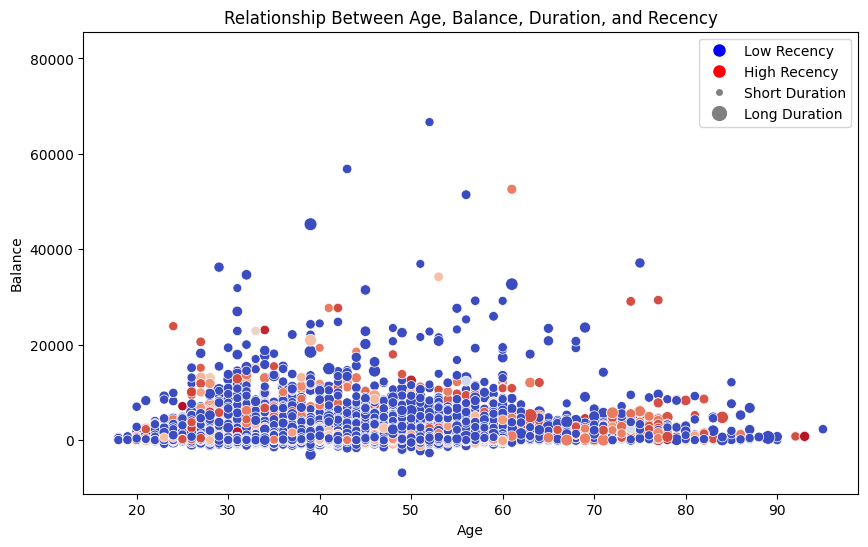

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Shorten the range for hue (recency) and sizes (duration)
scatter = sns.scatterplot(
    x='age', 
    y='balance', 
    size='duration', 
    hue='Recency', 
    sizes=(40, 150),  # Adjust size range
    palette='coolwarm_r',  # Reverse palette for better clarity
    data=numeric, 
    legend=False  # Disable default legend
)

# Customize the legend manually to make it shorter
from matplotlib.lines import Line2D

# Creating custom markers for the legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Low Recency', markersize=10, markerfacecolor='blue'),
    Line2D([0], [0], marker='o', color='w', label='High Recency', markersize=10, markerfacecolor='red'),
    Line2D([0], [0], marker='o', color='w', label='Short Duration', markersize=6, markerfacecolor='gray'),
    Line2D([0], [0], marker='o', color='w', label='Long Duration', markersize=12, markerfacecolor='gray'),
]

# Add the custom legend to the plot
plt.legend(handles=legend_elements, loc='upper right')

# Set plot title and labels
plt.title('Relationship Between Age, Balance, Duration, and Recency')
plt.xlabel('Age')
plt.ylabel('Balance')

# Show the plot
plt.show()


In [80]:
monthly_numeric = categorical_data[['month_numerical']]

In [81]:
monthly_numeric 

month_numerical
0                    5
1                    5
2                    5
3                    5
4                    5
...                ...
11157                4
11158                6
11159                8
11160                5
11161                7

[11162 rows x 1 columns]

In [82]:
numeric_df = pd.concat([numeric, monthly_numeric ], axis=1)

In [83]:
numeric_df

age  balance  day  duration  campaign  Recency  previous  \
0       59     2343    5      1042         1      999         0   
1       56       45    5      1467         1      999         0   
2       41     1270    5      1389         1      999         0   
3       55     2476    5       579         1      999         0   
4       54      184    5       673         2      999         0   
...    ...      ...  ...       ...       ...      ...       ...   
11157   33        1   20       257         1      999         0   
11158   39      733   16        83         4      999         0   
11159   32       29   19       156         2      999         0   
11160   43        0    8         9         2      172         5   
11161   34        0    9       628         1      999         0   

       month_numerical  
0                    5  
1                    5  
2                    5  
3                    5  
4                    5  
...                ...  
11157                4  
11158                6  
11159                8  
11160                5  
11161                7  

[11162 rows x 8 columns]

In [84]:
categorical_data.drop('month_numerical',axis=1,inplace =True)
categorical_data

job  marital  education default housing loan   contact month  \
0           admin.  married  secondary      no     yes   no   unknown   may   
1           admin.  married  secondary      no      no   no   unknown   may   
2       technician  married  secondary      no     yes   no   unknown   may   
3         services  married  secondary      no     yes   no   unknown   may   
4           admin.  married   tertiary      no      no   no   unknown   may   
...            ...      ...        ...     ...     ...  ...       ...   ...   
11157  blue-collar   single    primary      no     yes   no  cellular   apr   
11158     services  married  secondary      no      no   no   unknown   jun   
11159   technician   single  secondary      no      no   no  cellular   aug   
11160   technician  married  secondary      no      no  yes  cellular   may   
11161   technician  married  secondary      no      no   no  cellular   jul   

      poutcome deposit  
0      unknown     yes  
1      unknown     yes  
2      unknown     yes  
3      unknown     yes  
4      unknown     yes  
...        ...     ...  
11157  unknown      no  
11158  unknown      no  
11159  unknown      no  
11160  failure      no  
11161  unknown      no  

[11162 rows x 10 columns]

In [85]:
categorical_data.drop('month',axis=1,inplace =True)
categorical_data

job  marital  education default housing loan   contact  \
0           admin.  married  secondary      no     yes   no   unknown   
1           admin.  married  secondary      no      no   no   unknown   
2       technician  married  secondary      no     yes   no   unknown   
3         services  married  secondary      no     yes   no   unknown   
4           admin.  married   tertiary      no      no   no   unknown   
...            ...      ...        ...     ...     ...  ...       ...   
11157  blue-collar   single    primary      no     yes   no  cellular   
11158     services  married  secondary      no      no   no   unknown   
11159   technician   single  secondary      no      no   no  cellular   
11160   technician  married  secondary      no      no  yes  cellular   
11161   technician  married  secondary      no      no   no  cellular   

      poutcome deposit  
0      unknown     yes  
1      unknown     yes  
2      unknown     yes  
3      unknown     yes  
4      unknown     yes  
...        ...     ...  
11157  unknown      no  
11158  unknown      no  
11159  unknown      no  
11160  failure      no  
11161  unknown      no  

[11162 rows x 9 columns]

In [86]:
from sklearn.preprocessing import LabelEncoder

# Create a deep copy of the DataFrame
cat = categorical_data.copy(deep=True)

# Initialize LabelEncoder
le = LabelEncoder()

print('Label Encoder Transformation')
for feature in categorical_data:
    cat[feature] = le.fit_transform(cat[feature])
    print(f"{feature} : {cat[feature].unique()} = {le.inverse_transform(cat[feature].unique())}")

# Display the transformed DataFrame
print(cat.head())

Label Encoder Transformation
job : [ 0  9  7  4  5  1 10  2  3 11  6  8] = ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital : [1 2 0] = ['married' 'single' 'divorced']
education : [1 2 0 3] = ['secondary' 'tertiary' 'primary' 'unknown']
default : [0 1] = ['no' 'yes']
housing : [1 0] = ['yes' 'no']
loan : [0 1] = ['no' 'yes']
contact : [2 0 1] = ['unknown' 'cellular' 'telephone']
poutcome : [3 1 0 2] = ['unknown' 'other' 'failure' 'success']
deposit : [1 0] = ['yes' 'no']
   job  marital  education  default  housing  loan  contact  poutcome  deposit
0    0        1          1        0        1     0        2         3        1
1    0        1          1        0        0     0        2         3        1
2    9        1          1        0        1     0        2         3        1
3    7        1          1        0        1     0        2         3        1
4    0        1     

In [87]:
cat

job  marital  education  default  housing  loan  contact  poutcome  \
0        0        1          1        0        1     0        2         3   
1        0        1          1        0        0     0        2         3   
2        9        1          1        0        1     0        2         3   
3        7        1          1        0        1     0        2         3   
4        0        1          2        0        0     0        2         3   
...    ...      ...        ...      ...      ...   ...      ...       ...   
11157    1        2          0        0        1     0        0         3   
11158    7        1          1        0        0     0        2         3   
11159    9        2          1        0        0     0        0         3   
11160    9        1          1        0        0     1        0         0   
11161    9        1          1        0        0     0        0         3   

       deposit  
0            1  
1            1  
2            1  
3            1  
4            1  
...        ...  
11157        0  
11158        0  
11159        0  
11160        0  
11161        0  

[11162 rows x 9 columns]

In [88]:
combined_df = pd.concat([cat, numeric_df], axis=1)

In [89]:
combined_df

job  marital  education  default  housing  loan  contact  poutcome  \
0        0        1          1        0        1     0        2         3   
1        0        1          1        0        0     0        2         3   
2        9        1          1        0        1     0        2         3   
3        7        1          1        0        1     0        2         3   
4        0        1          2        0        0     0        2         3   
...    ...      ...        ...      ...      ...   ...      ...       ...   
11157    1        2          0        0        1     0        0         3   
11158    7        1          1        0        0     0        2         3   
11159    9        2          1        0        0     0        0         3   
11160    9        1          1        0        0     1        0         0   
11161    9        1          1        0        0     0        0         3   

       deposit  age  balance  day  duration  campaign  Recency  previous  \
0            1   59     2343    5      1042         1      999         0   
1            1   56       45    5      1467         1      999         0   
2            1   41     1270    5      1389         1      999         0   
3            1   55     2476    5       579         1      999         0   
4            1   54      184    5       673         2      999         0   
...        ...  ...      ...  ...       ...       ...      ...       ...   
11157        0   33        1   20       257         1      999         0   
11158        0   39      733   16        83         4      999         0   
11159        0   32       29   19       156         2      999         0   
11160        0   43        0    8         9         2      172         5   
11161        0   34        0    9       628         1      999         0   

       month_numerical  
0                    5  
1                    5  
2                    5  
3                    5  
4                    5  
...                ...  
11157                4  
11158                6  
11159                8  
11160                5  
11161                7  

[11162 rows x 17 columns]

In [90]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [91]:
scaler = MinMaxScaler()
final_df = pd.DataFrame(scaler.fit_transform(combined_df), columns=combined_df.columns)


In [92]:
final_df

job  marital  education  default  housing  loan  contact  poutcome  \
0      0.00      0.5       0.33      0.0      1.0   0.0      1.0       1.0   
1      0.00      0.5       0.33      0.0      0.0   0.0      1.0       1.0   
2      0.82      0.5       0.33      0.0      1.0   0.0      1.0       1.0   
3      0.64      0.5       0.33      0.0      1.0   0.0      1.0       1.0   
4      0.00      0.5       0.67      0.0      0.0   0.0      1.0       1.0   
...     ...      ...        ...      ...      ...   ...      ...       ...   
11157  0.09      1.0       0.00      0.0      1.0   0.0      0.0       1.0   
11158  0.64      0.5       0.33      0.0      0.0   0.0      1.0       1.0   
11159  0.82      1.0       0.33      0.0      0.0   0.0      0.0       1.0   
11160  0.82      0.5       0.33      0.0      0.0   1.0      0.0       0.0   
11161  0.82      0.5       0.33      0.0      0.0   0.0      0.0       1.0   

       deposit   age  balance   day  duration  campaign  Recency  previous  \
0          1.0  0.53     0.10  0.13  2.68e-01      0.00     1.00      0.00   
1          1.0  0.49     0.08  0.13  3.78e-01      0.00     1.00      0.00   
2          1.0  0.30     0.09  0.13  3.58e-01      0.00     1.00      0.00   
3          1.0  0.48     0.11  0.13  1.49e-01      0.00     1.00      0.00   
4          1.0  0.47     0.08  0.13  1.73e-01      0.02     1.00      0.00   
...        ...   ...      ...   ...       ...       ...      ...       ...   
11157      0.0  0.19     0.08  0.63  6.57e-02      0.00     1.00      0.00   
11158      0.0  0.27     0.09  0.50  2.09e-02      0.05     1.00      0.00   
11159      0.0  0.18     0.08  0.60  3.97e-02      0.02     1.00      0.00   
11160      0.0  0.32     0.08  0.23  1.80e-03      0.02     0.17      0.09   
11161      0.0  0.21     0.08  0.27  1.61e-01      0.00     1.00      0.00   

       month_numerical  
0                 0.36  
1                 0.36  
2                 0.36  
3                 0.36  
4                 0.36  
...                ...  
11157             0.27  
11158             0.45  
11159             0.64  
11160             0.36  
11161             0.55  

[11162 rows x 17 columns]

---
# Building a Model
---

In [93]:
final_df.isnull().sum()

job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
poutcome           0
deposit            0
age                0
balance            0
day                0
duration           0
campaign           0
Recency            0
previous           0
month_numerical    0
dtype: int64

In [94]:
final_df.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'deposit', 'age', 'balance', 'day', 'duration', 'campaign',
       'Recency', 'previous', 'month_numerical'],
      dtype='object')

In [95]:
# Separate target variable from independent variables
y = final_df['deposit']
X = final_df.drop(columns=['deposit'])
print(X.shape)
print(y.shape)

(11162, 16)
(11162,)


In [96]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8371, 16)
(8371,)
(2791, 16)
(2791,)


In [98]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000)

In [99]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,  # Feature names from X_train
    'importance': model.feature_importances_  # Feature importance values from the fitted model
})

# Sorting the feature importance in descending order
feature_importances = feature_importances.sort_values(by='importance', ascending=False).reset_index(drop=True)

# Display the result
print(feature_importances)

           features  importance
0          duration    3.73e-01
1           balance    8.41e-02
2   month_numerical    8.32e-02
3               age    8.10e-02
4               day    7.74e-02
5           Recency    4.87e-02
6           contact    4.20e-02
7               job    3.75e-02
8          campaign    3.39e-02
9          poutcome    3.31e-02
10          housing    2.89e-02
11         previous    2.57e-02
12        education    2.29e-02
13          marital    1.78e-02
14             loan    9.84e-03
15          default    1.34e-03


In [100]:
feature_importances

features  importance
0          duration    3.73e-01
1           balance    8.41e-02
2   month_numerical    8.32e-02
3               age    8.10e-02
4               day    7.74e-02
5           Recency    4.87e-02
6           contact    4.20e-02
7               job    3.75e-02
8          campaign    3.39e-02
9          poutcome    3.31e-02
10          housing    2.89e-02
11         previous    2.57e-02
12        education    2.29e-02
13          marital    1.78e-02
14             loan    9.84e-03
15          default    1.34e-03

The **feature importance analysis** provides insights into the key drivers influencing the model's predictions. The **most impactful feature** is **duration (0.373),** indicating that the **length of a client’s interaction** has **the strongest influence** on **the likelihood** of **the target outcome.** Other **important factors** include **balance (0.0841), month_numerical (0.0832), and age (0.0810),** highlighting the **significance** of a client's **financial stability, the time of year, and age** in **predicting outcomes (client taking a term deposit).** Less influential features include loan (0.00984) and default (0.00134), suggesting they have minimal effect on the model’s predictions. The analysis underscores the critical role of interaction time (duration) and financial factors in shaping the model's decisions, while personal demographics like education, marital status, and job contribute moderately. This feature importance ranking helps guide focus areas for further model improvement and potential business strategies.

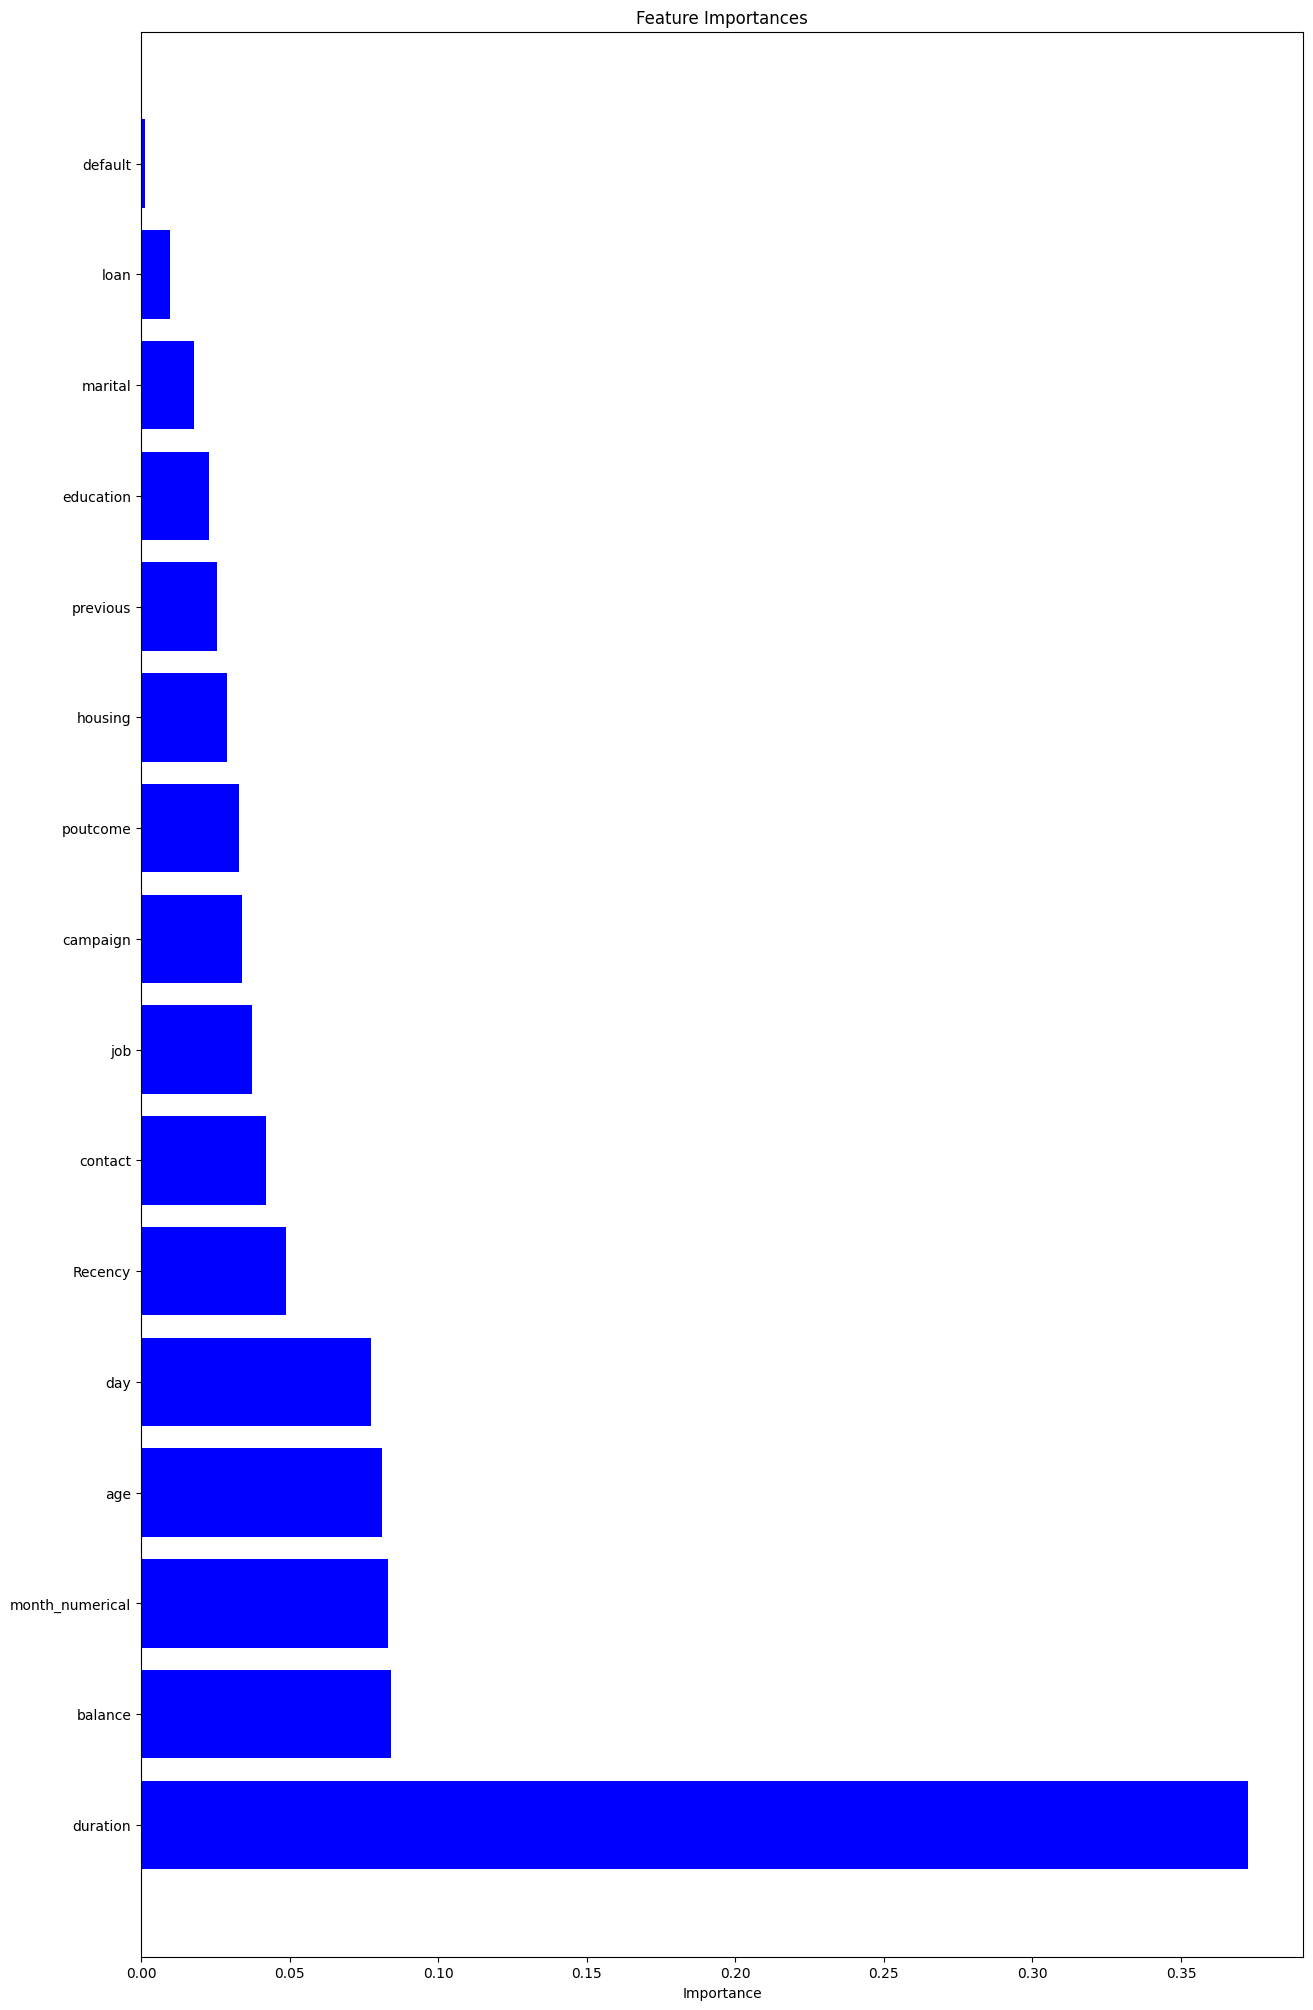

In [101]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicting the target values for the test set
predictions = model.predict(X_test)

# Calculating regression metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5  # or use sklearn.metrics.mean_squared_error with squared=False
r2 = r2_score(y_test, predictions)

# Printing the metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")



Mean Absolute Error: 0.15585811537083483
Mean Squared Error: 0.15585811537083483
Root Mean Squared Error: 0.3947886971163623
R-squared: 0.37561521252796437


The model's performance metrics indicate moderate predictive accuracy. The Mean Absolute Error (MAE) is 0.156, which reflects the average difference between the predicted and actual values. The Mean Squared Error (MSE), also 0.156, further emphasizes the magnitude of error, while the Root Mean Squared Error (RMSE) of 0.395 shows that predictions deviate from actual values by approximately 39.5% on average. The R-squared value of 0.376 suggests that about 37.6% of the variability in the target variable is explained by the model, implying room for improvement in model accuracy.

In [103]:
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [104]:
y_test.value_counts()

deposit
0.0    1450
1.0    1341
Name: count, dtype: int64

In [105]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 1173
False positives: 267
True negatives: 1183
False negatives: 168

Accuracy: 0.8441418846291652
Precision: 0.8145833333333333
Recall: 0.8747203579418344


The model demonstrated **strong performance** in classifying the target variable, as evidenced by **an accuracy of 84.41%,** meaning it correctly predicted the outcome for the majority of cases. With 1173 true positives and 1183 true negatives, the model accurately identified both positive and negative classes. The precision of 81.46% indicates that when the model predicted a positive outcome, it was correct 81.46% of the time, while the recall of 87.47% shows that it correctly identified 87.47% of all actual positives. Despite some false positives (267) and false negatives (168), the model's balance between precision and recall suggests reliable performance, though **further tuning could reduce misclassifications**

**Hyperparameter Tuning**

In [106]:
important_features = ['duration','balance','month_numerical','age','day','Recency','contact','job','campaign','poutcome','housing','previous','education','marital','loan']

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'X' and 'y' with your actual feature matrix and target variable
# Assuming you already have your dataset loaded into 'data'

# Create a DataFrame with important features
important_features = ['duration','balance','month_numerical','age','day','Recency','contact','job','campaign',
                      'poutcome','housing','previous','education','marital','loan']

# Make a copy of our data
train_df = final_df.copy()

data_subset = train_df[important_features]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_subset, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)



Accuracy: 0.8334079713390058


In [111]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [1000, 1500, 1100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier()

# Initialize GridSearchCV with the Random Forest classifier and the hyperparameters grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a new Random Forest model using the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Evaluate the model
accuracy = best_rf_model.score(X_test, y_test)
print("Accuracy after hyperparameter tuning:", accuracy)


Accuracy after hyperparameter tuning: 0.8369905956112853


In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicting the target values for the test set
predictions = best_rf_model.predict(X_test)

# Calculating regression metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5  # or use sklearn.metrics.mean_squared_error with squared=False
r2 = r2_score(y_test, predictions)

# Printing the metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.16300940438871472
Mean Squared Error: 0.16300940438871472
Root Mean Squared Error: 0.4037442313999232
R-squared: 0.3466782196601299


In [113]:
import pickle
# Save the trained model and scaler
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump((model, scaler), file) 

In [114]:
best_params

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

---
# A/B Testing 
---

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('C:/Users/Collins PC/Downloads/bank_marketting_campaign/bank.csv')  


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Keep track of the original test indices
X_test_original = X_test.copy()  # This keeps the test set as a DataFrame to work with indices

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize the model
model.fit(X_train, y_train)  # Train the model

# A/B Testing: Contact Method

# Use the original X_test (before scaling) to identify the 'contact' column values
contact_test = data.loc[X_test_original.index, 'contact']  # Get 'contact' column values for the test set
group_a_idx = contact_test[contact_test == 'cellular'].index  # Indices for 'cellular'
group_b_idx = contact_test[contact_test == 'unknown'].index  # Indices for 'unknown'

# Get the actual subscription outcomes (y_test) for each group
actual_a = y_test.loc[group_a_idx]
actual_b = y_test.loc[group_b_idx]

# Calculate the mean subscription rate for each group
subscription_rate_a = actual_a.mean()
subscription_rate_b = actual_b.mean()

# Perform t-test to compare subscription rates
t_stat, p_value = stats.ttest_ind(actual_a, actual_b)

# Print results
print(f"Subscription Rate (Cellular): {subscription_rate_a:.4f}")
print(f"Subscription Rate (Unknown): {subscription_rate_b:.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret results
if p_value < 0.05:  # Assuming a significance level of 0.05
    print("There is a statistically significant difference in subscription rates between the two contact methods.")
else:
    print("There is no statistically significant difference in subscription rates between the two contact methods.")


Subscription Rate (Cellular): 0.5459
Subscription Rate (Unknown): 0.2363
T-statistic: 12.4389
P-value: 0.0000
There is a statistically significant difference in subscription rates between the two contact methods.


**Key Findings:**

**Subscription Rate for "Cellular" Contact Method:**

The **average subscription rate** for individuals contacted via cellular was **54.59%.**
Subscription Rate for "Unknown" Contact Method:

The **average subscription rate** for individuals with an unknown contact method was **23.63%.**

**Statistical Test Results:**

A t-test was performed to compare the subscription rates between the two contact methods.

The t-statistic was **12.44,** with a p-value of **0.0000 (rounded)**.

Since the p-value is **significantly below** the conventional **threshold of 0.05**, this indicates that the difference in subscription rates between the two groups is **statistically significant.**

**Conclusion:**

The A/B test results suggest that the contact method has a substantial impact on subscription rates. Specifically, individuals contacted via cellular had a significantly higher likelihood of subscribing compared to those for whom the contact method was unknown. This difference is unlikely to be due to random chance (p < 0.05).

**Recommendation:**

Based on these findings, it is advisable for the organization to prioritize or increase efforts toward using cellular contact methods for customer outreach, as this appears to lead to higher subscription rates.